In [8]:
# Import needed packages and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('kc_house_data.csv')


## Various fooling around

### Exploring bedrooms

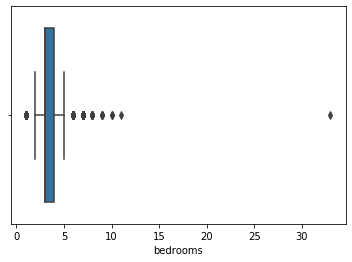

In [2]:
sns.boxplot(data['bedrooms'])

### Making the month column

In [58]:
data['month'] = [x.split('/')[0] for x in data['date']]
data['month'] = pd.to_numeric(data['month'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
dtypes: float64(8), int64(12), object

In [9]:
data['month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

### Rough look at qq plots for all but date and basement

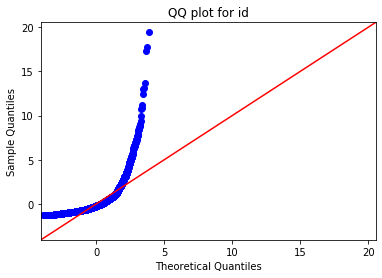

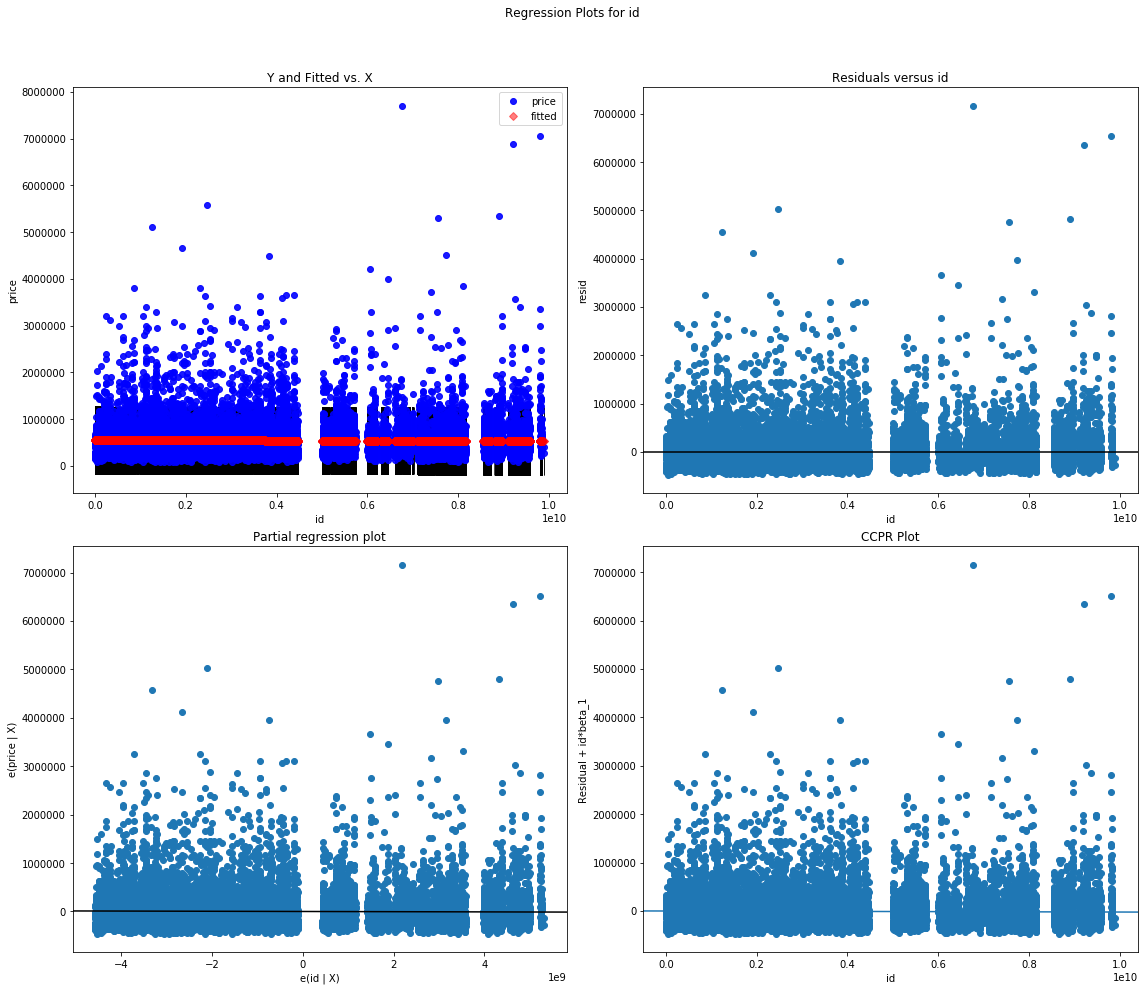

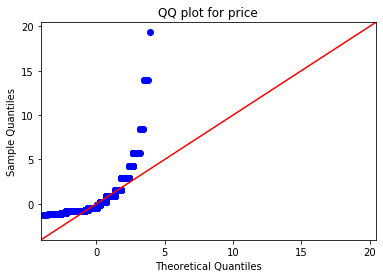

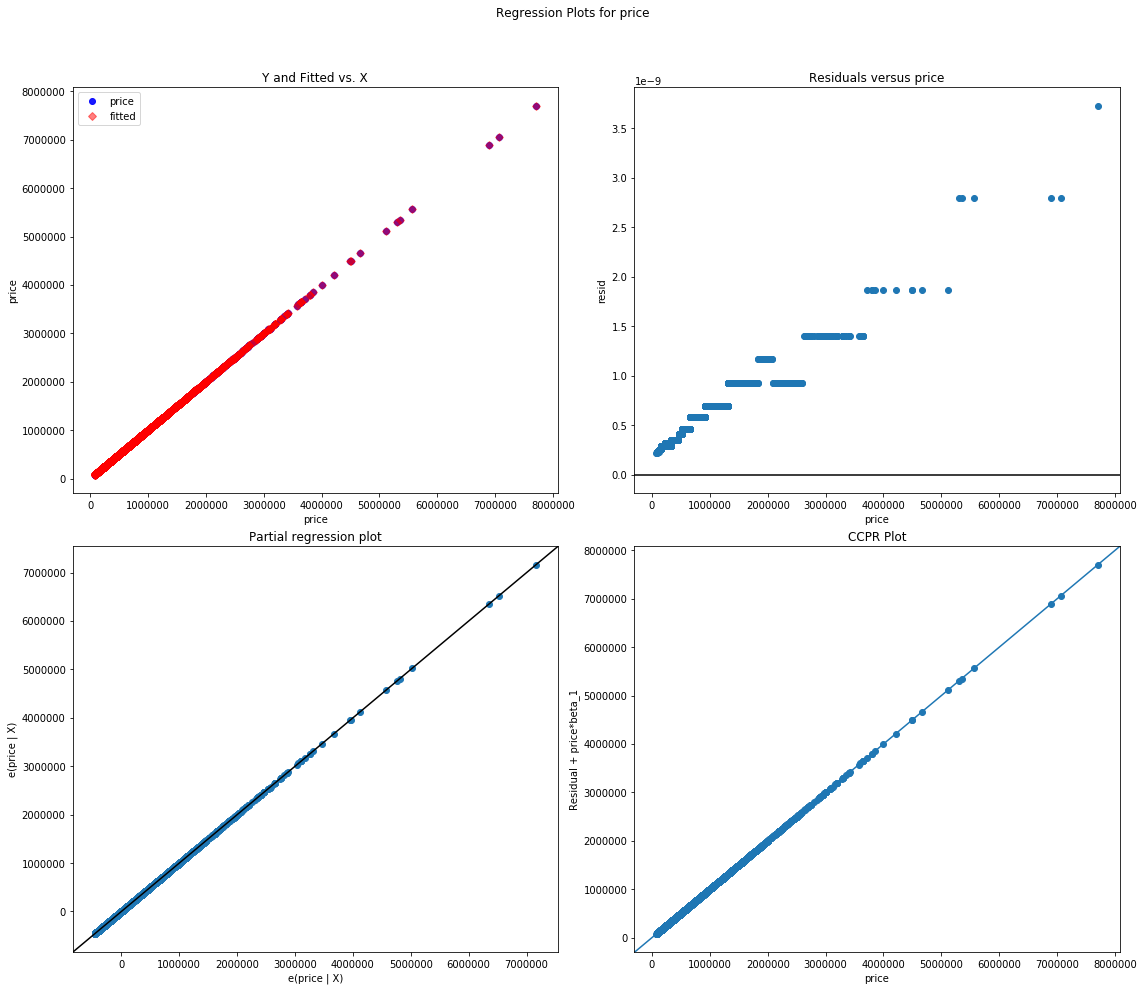

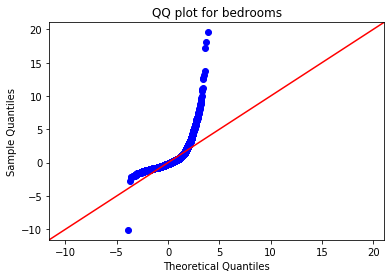

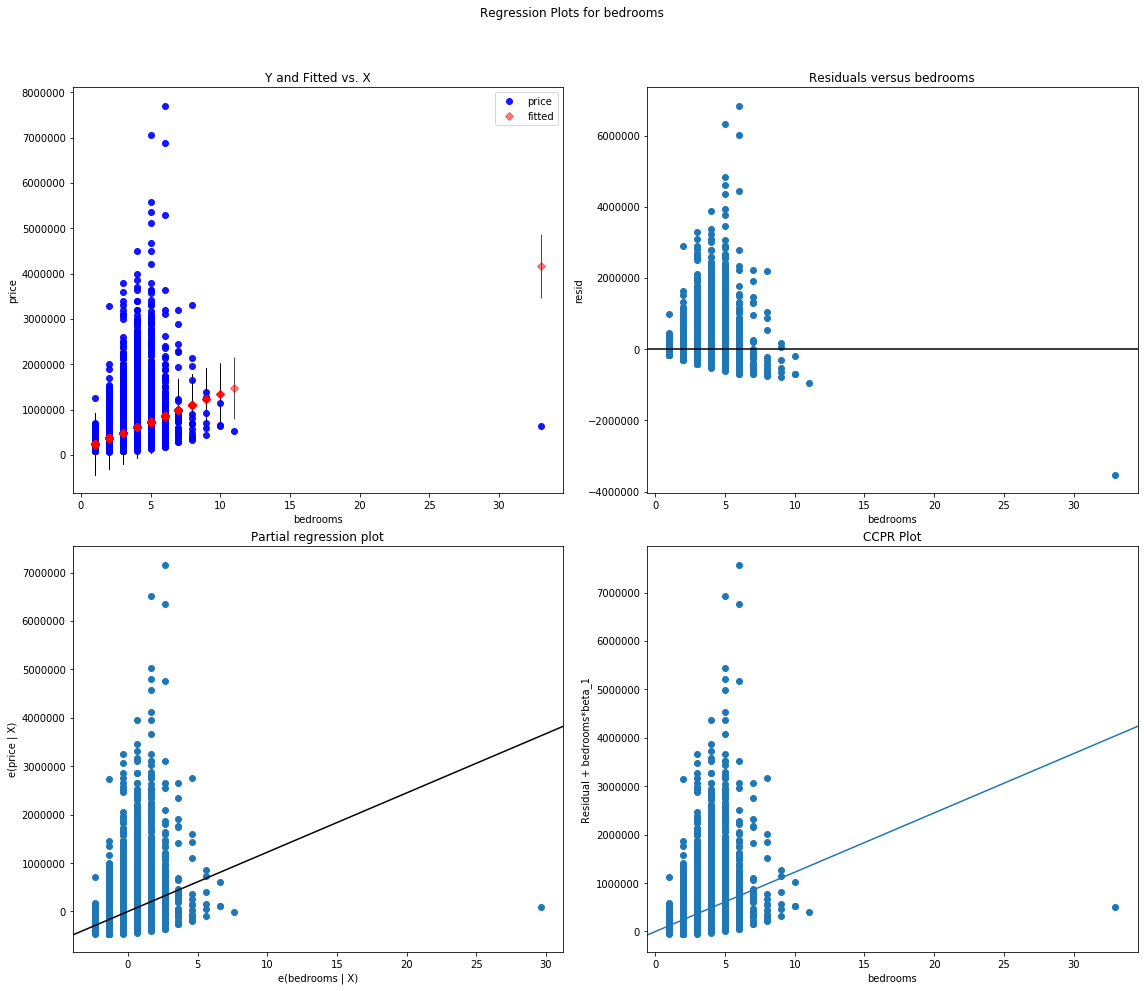

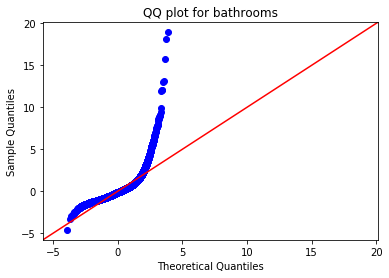

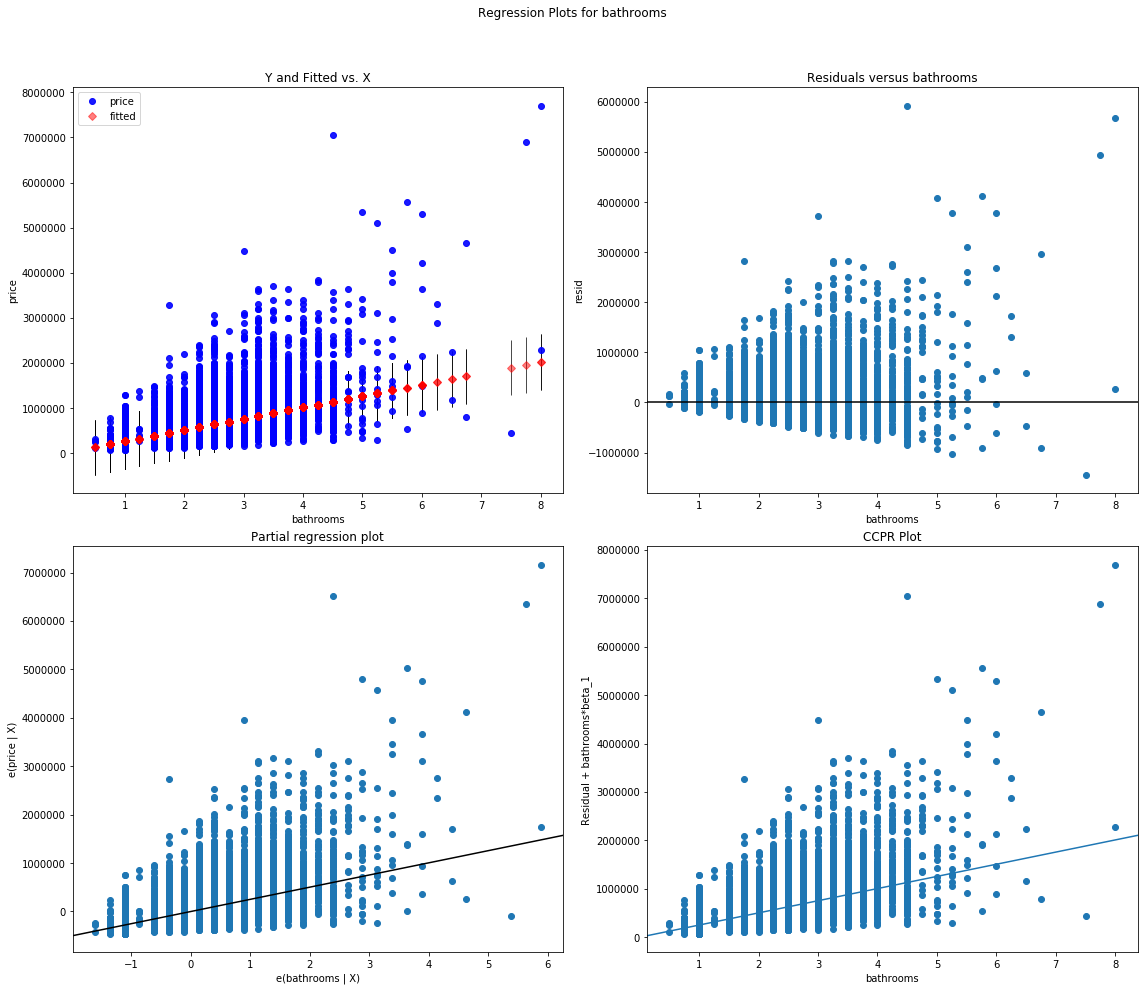

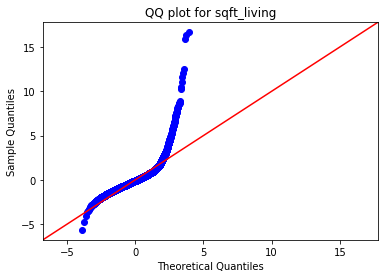

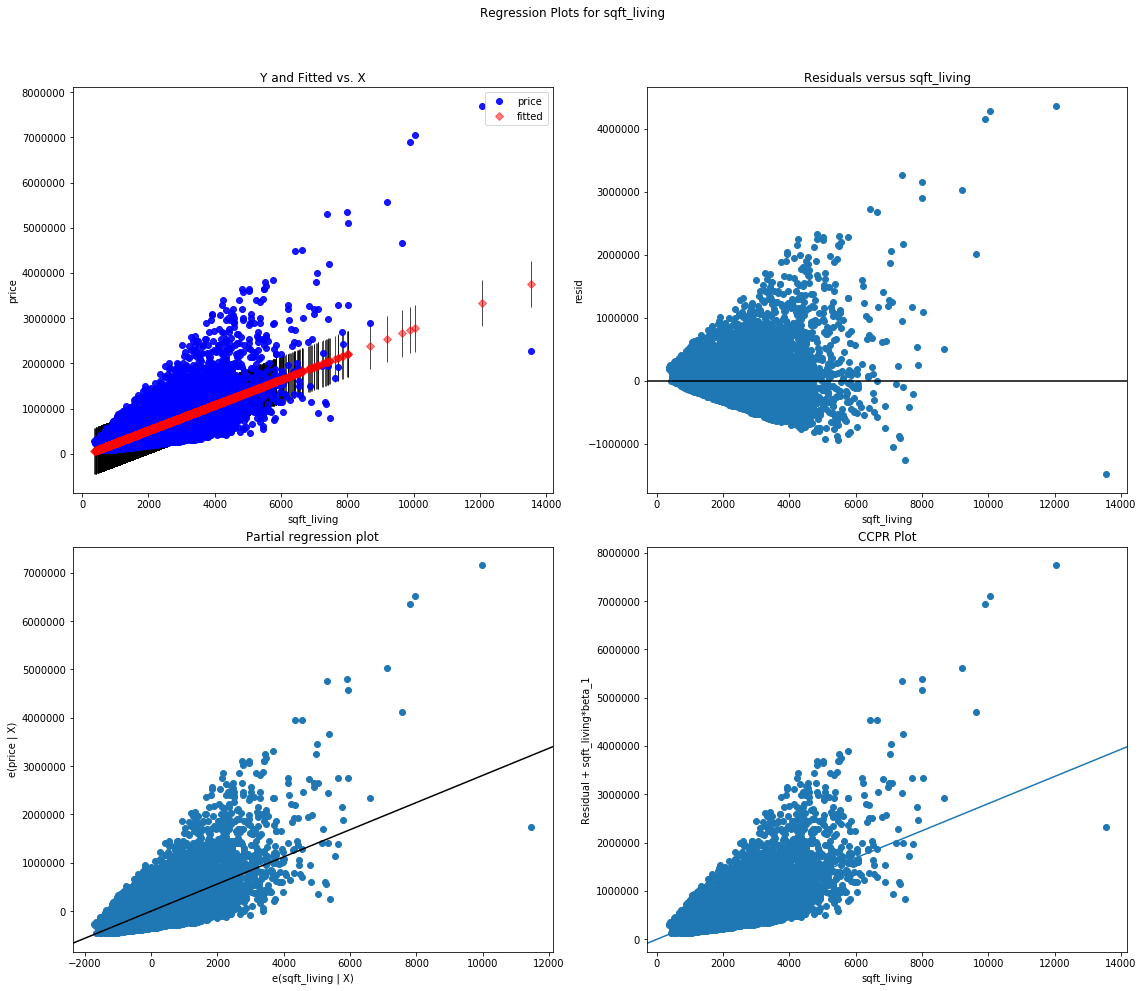

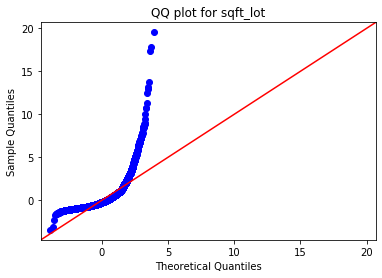

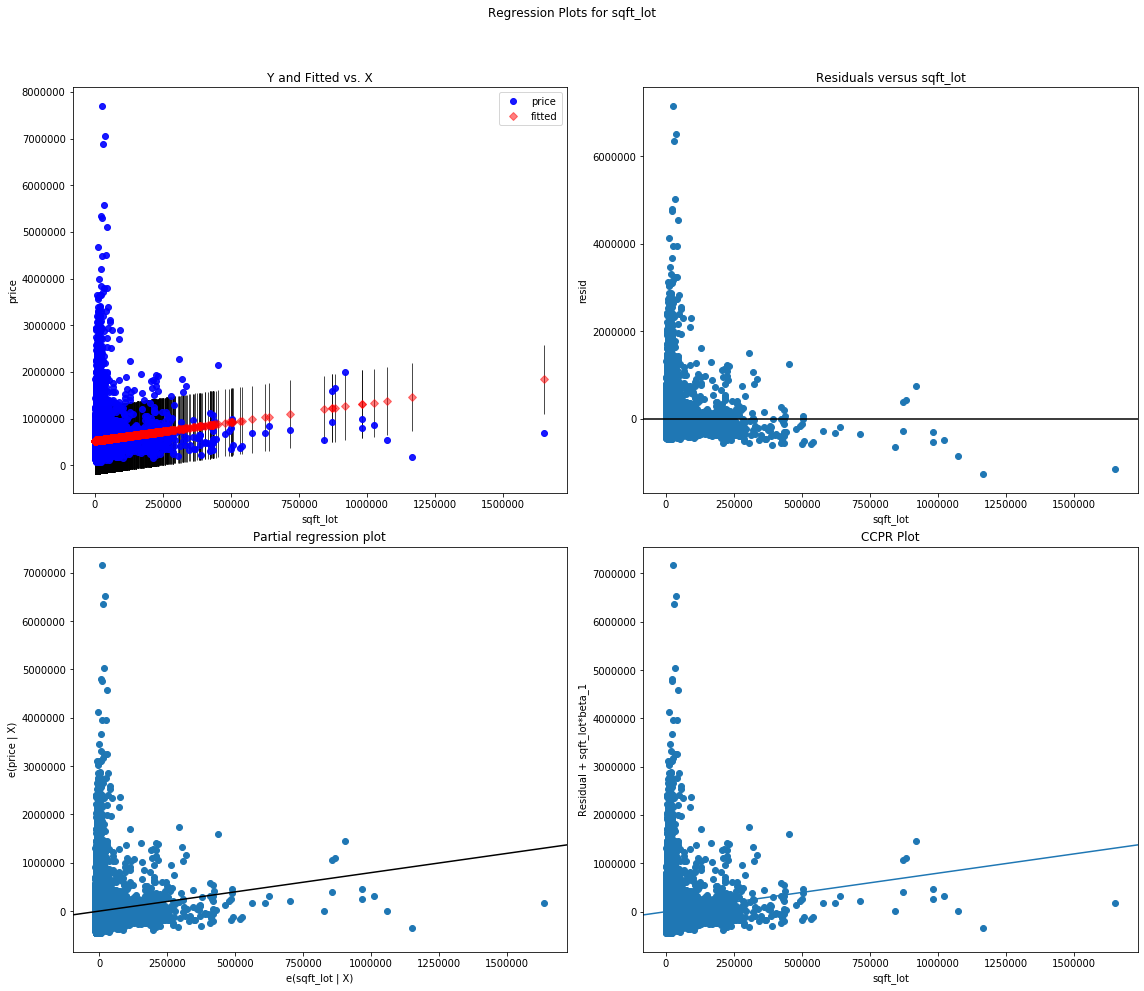

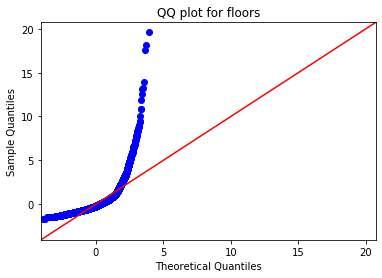

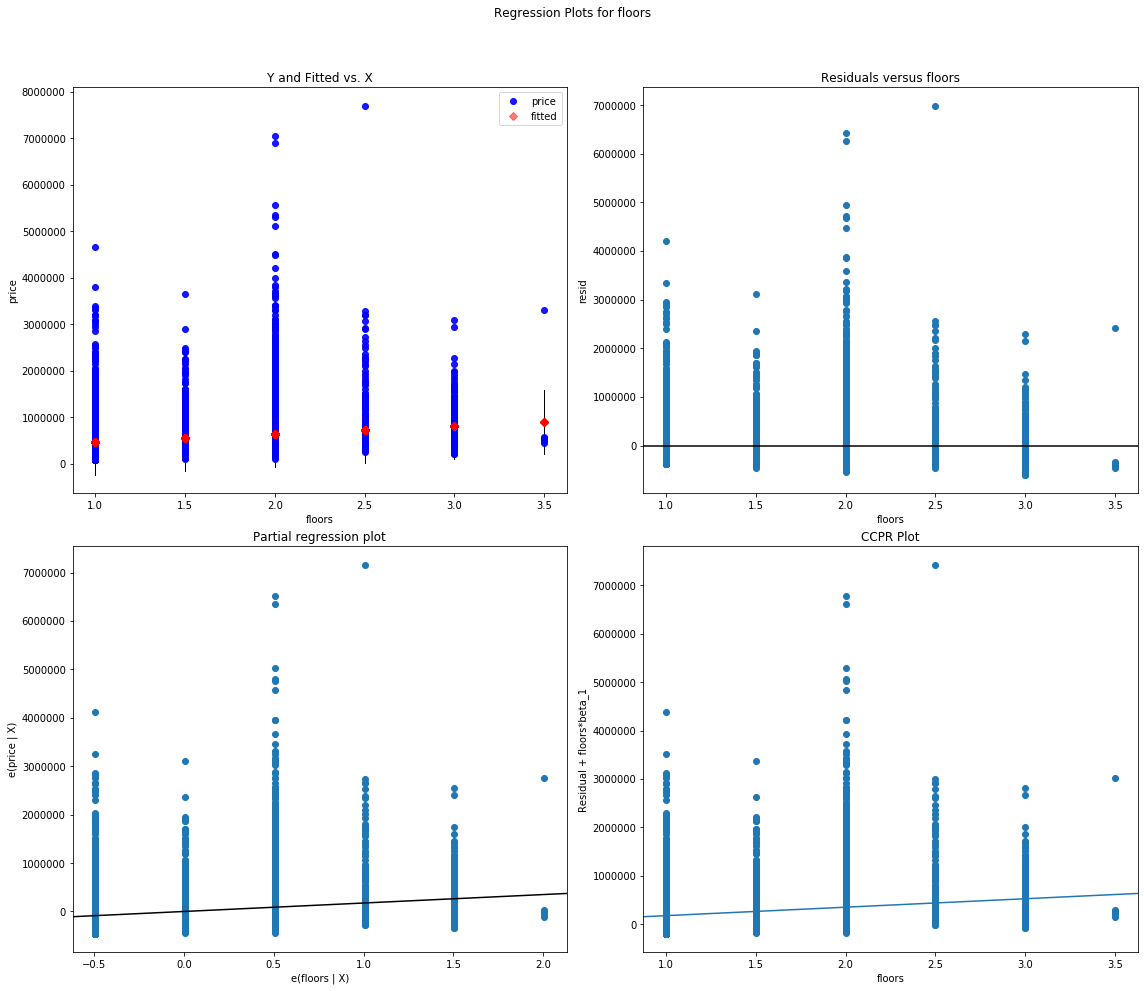

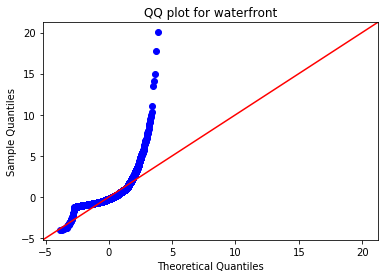

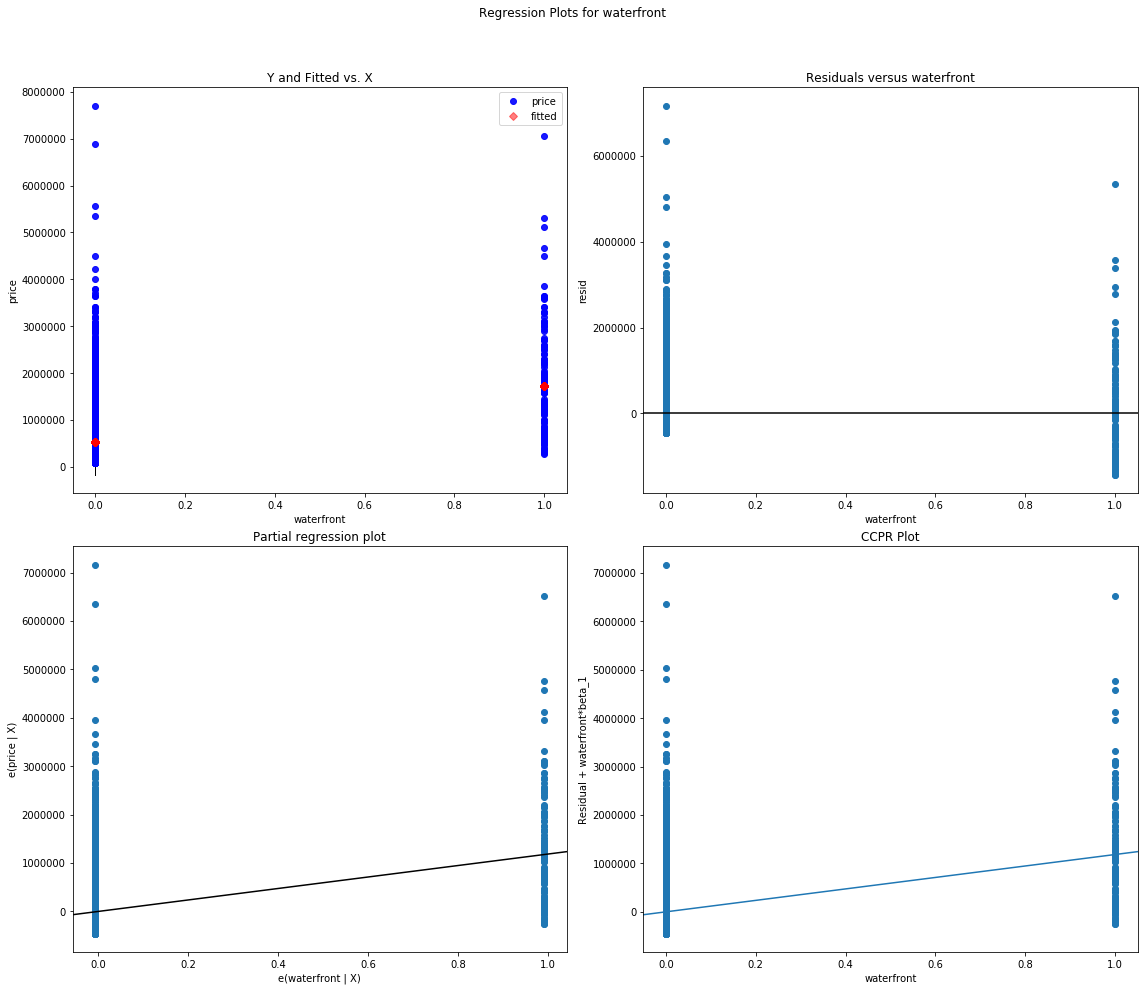

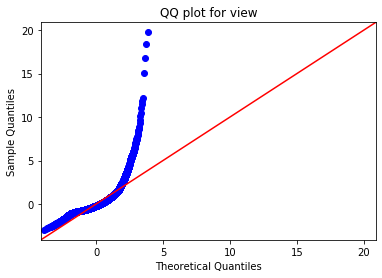

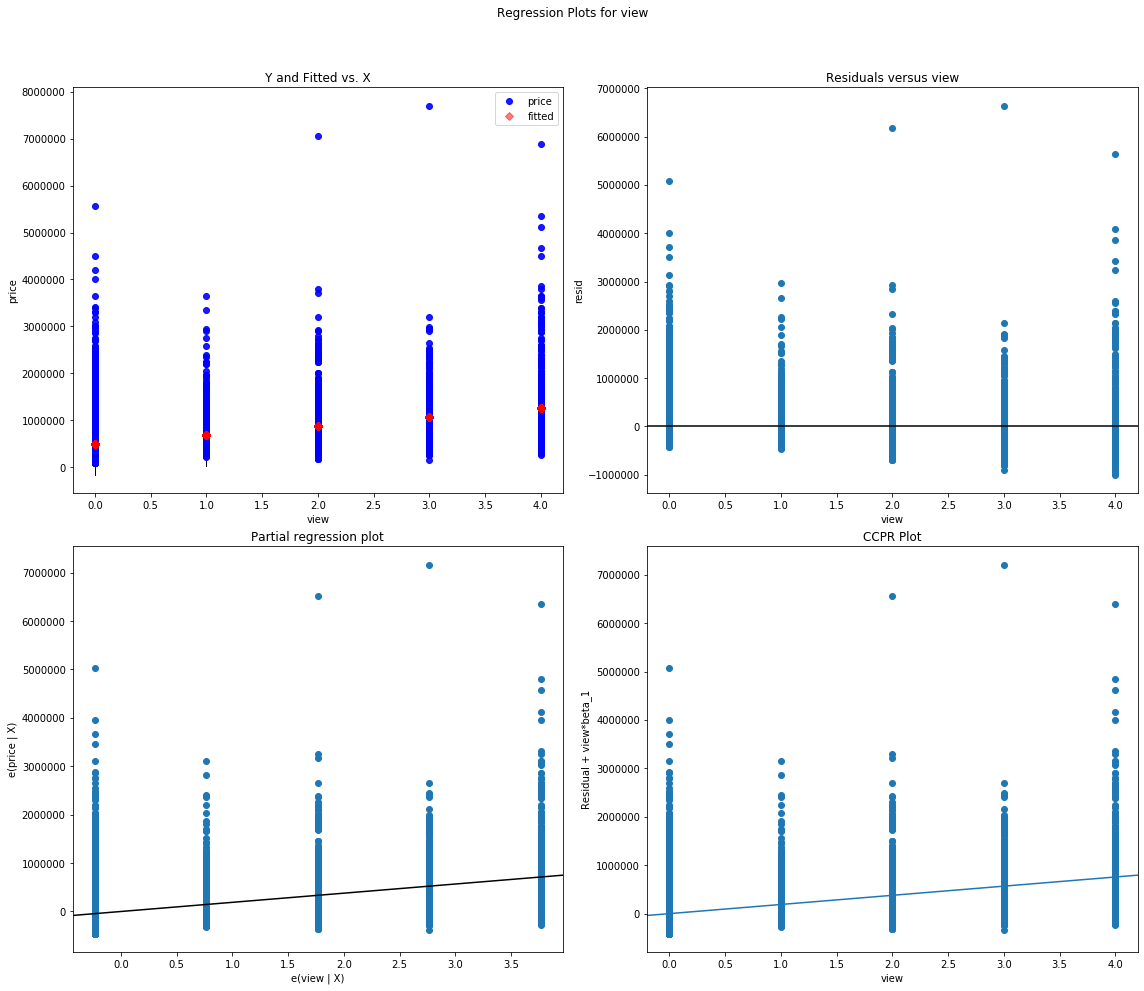

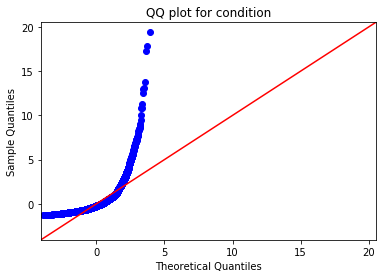

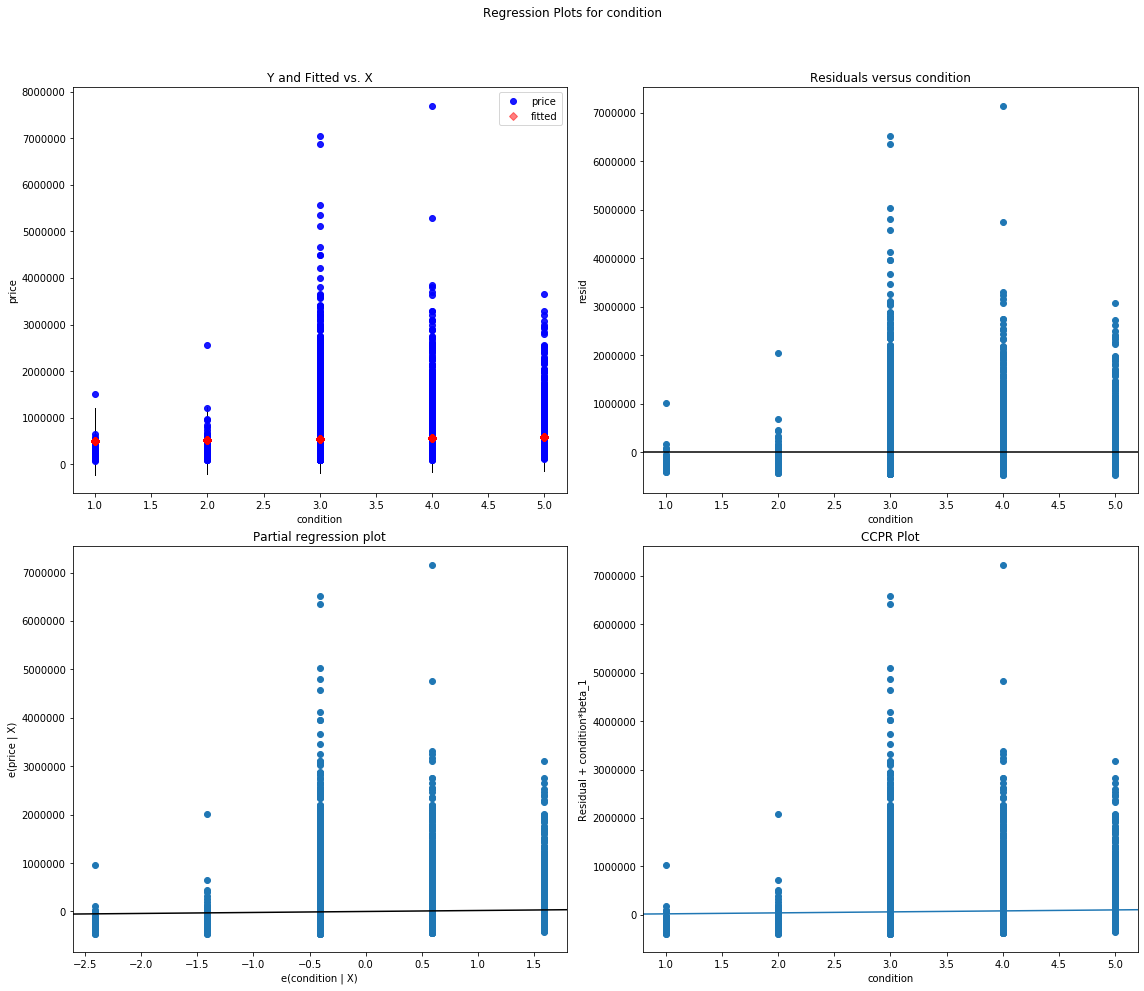

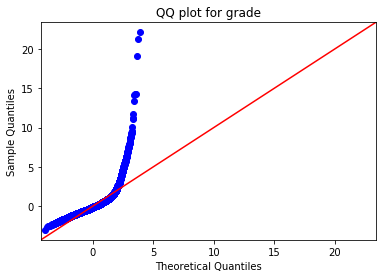

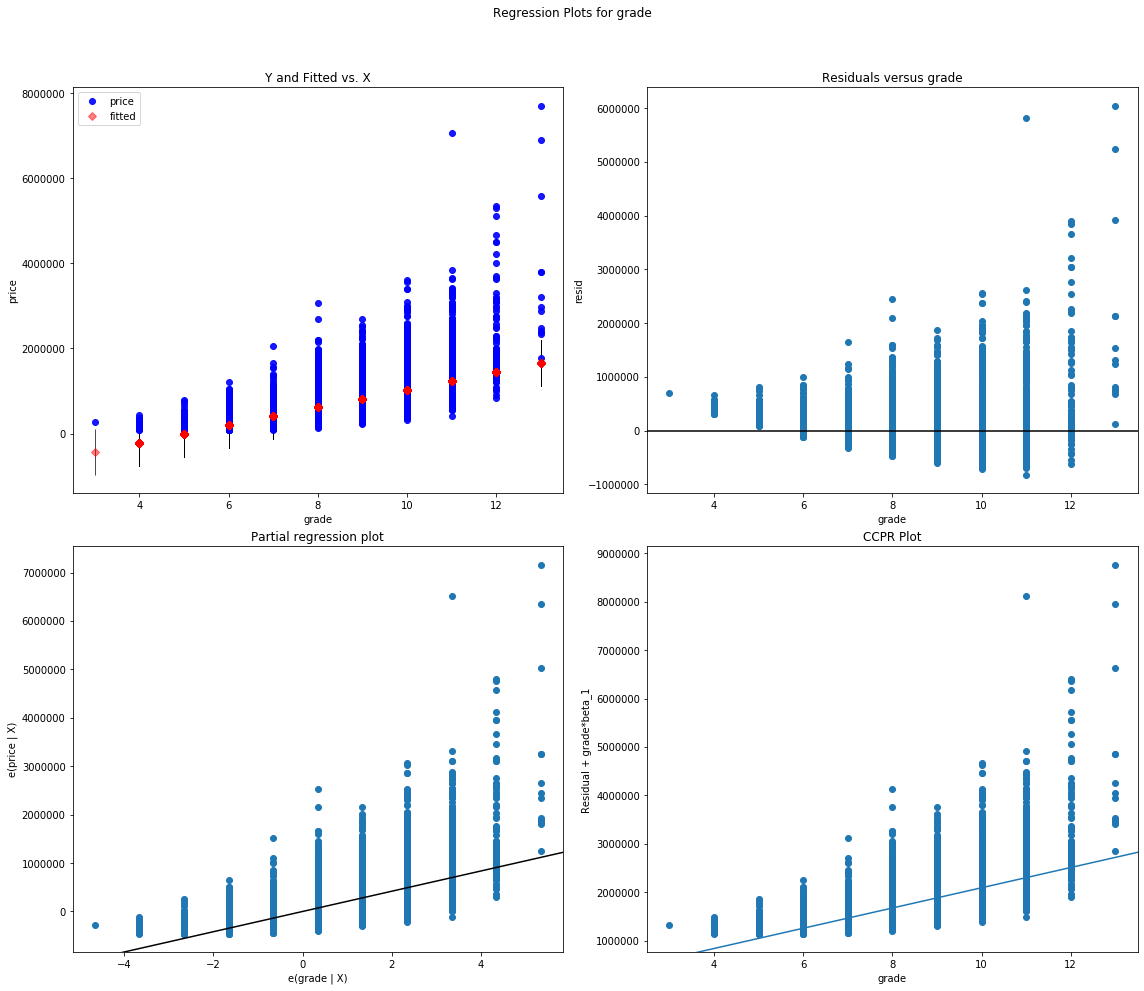

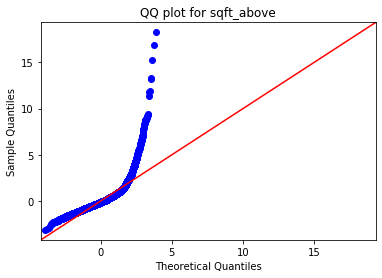

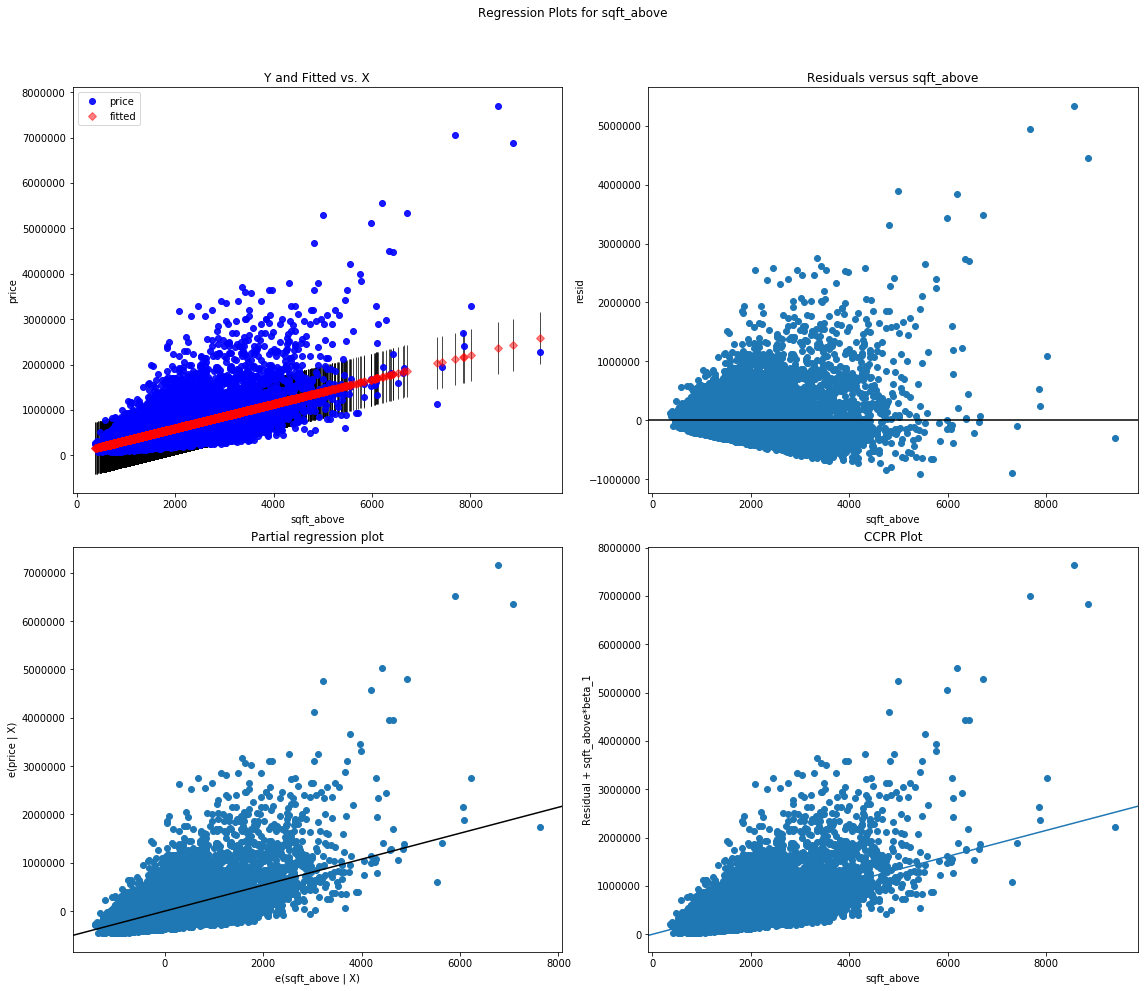

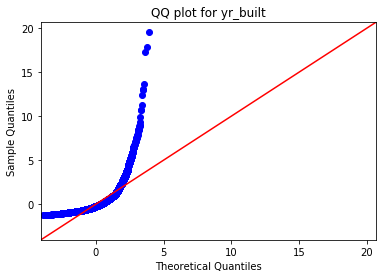

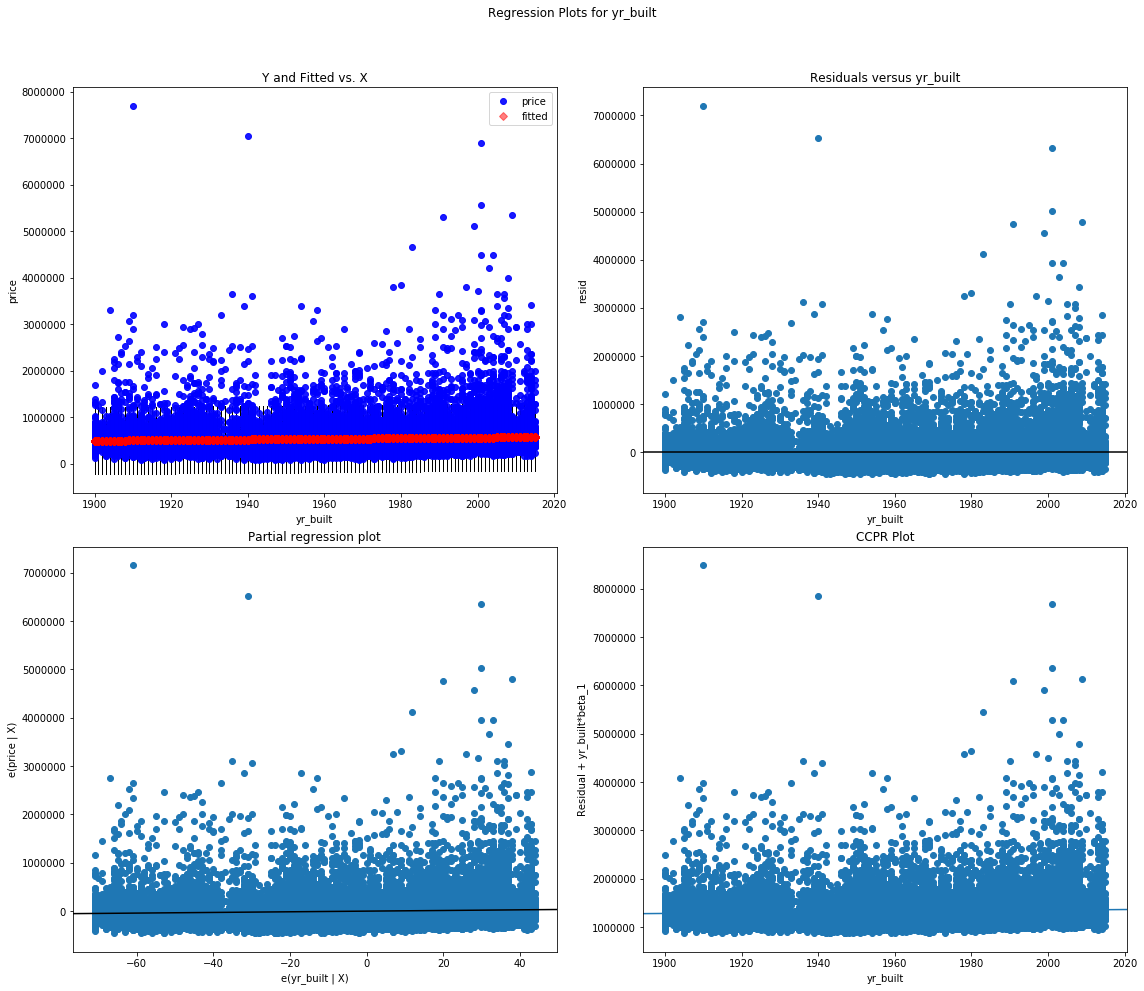

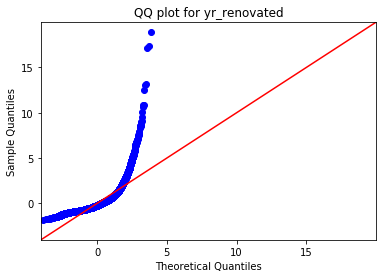

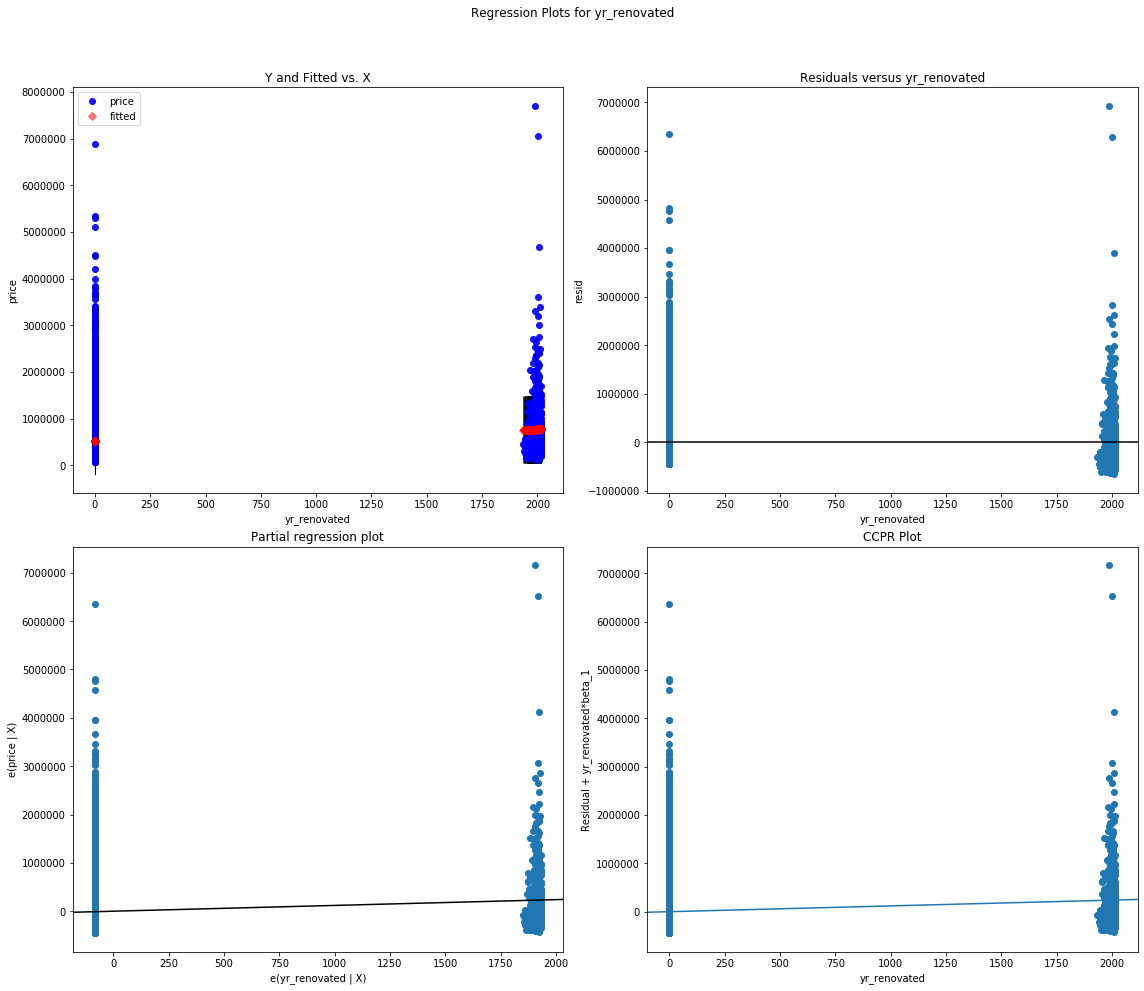

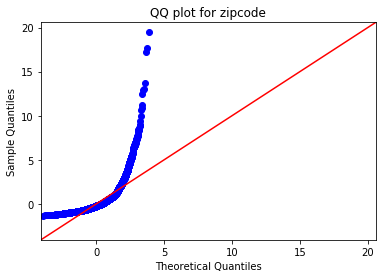

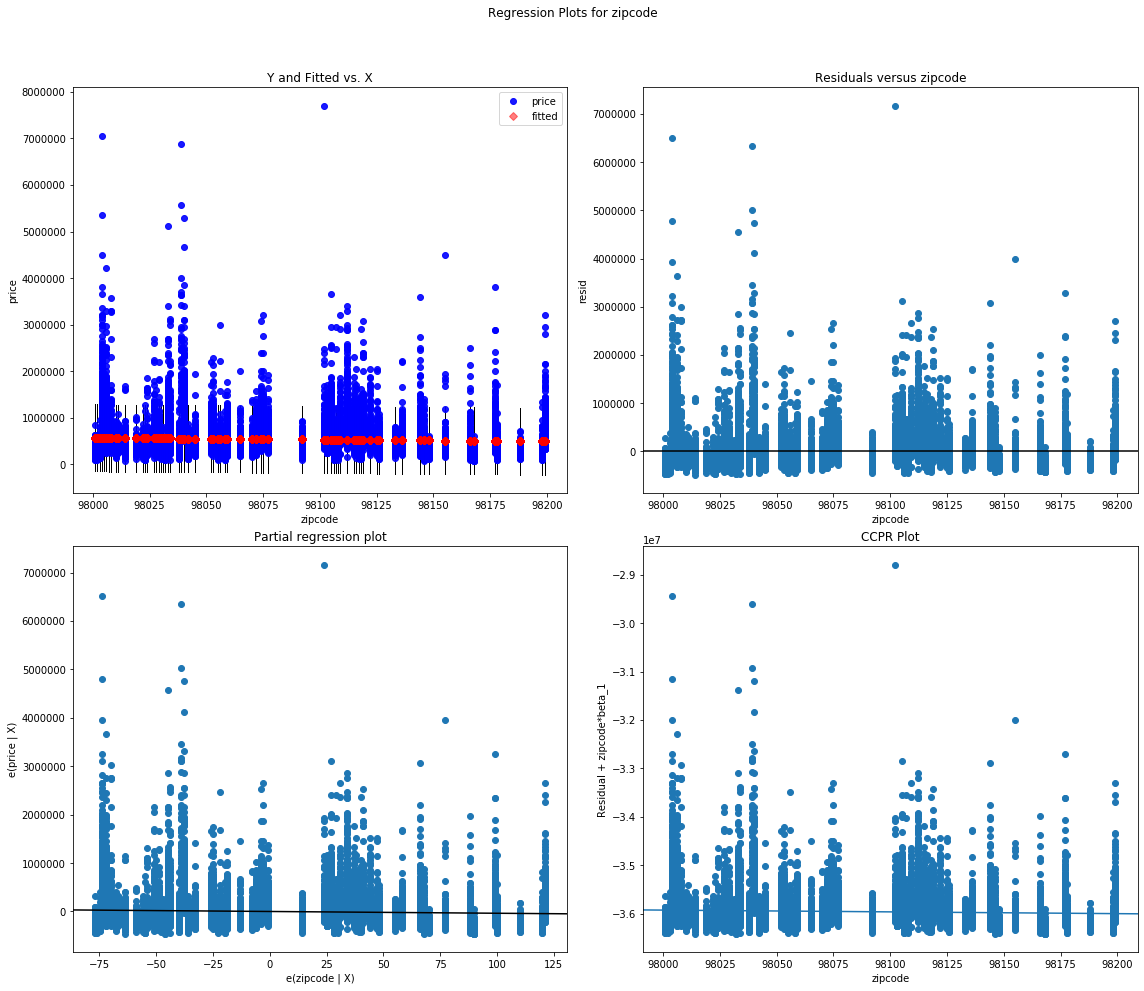

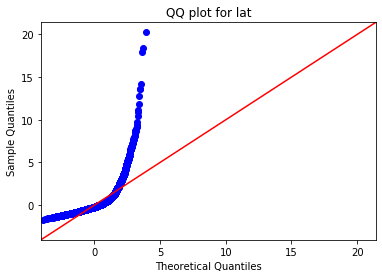

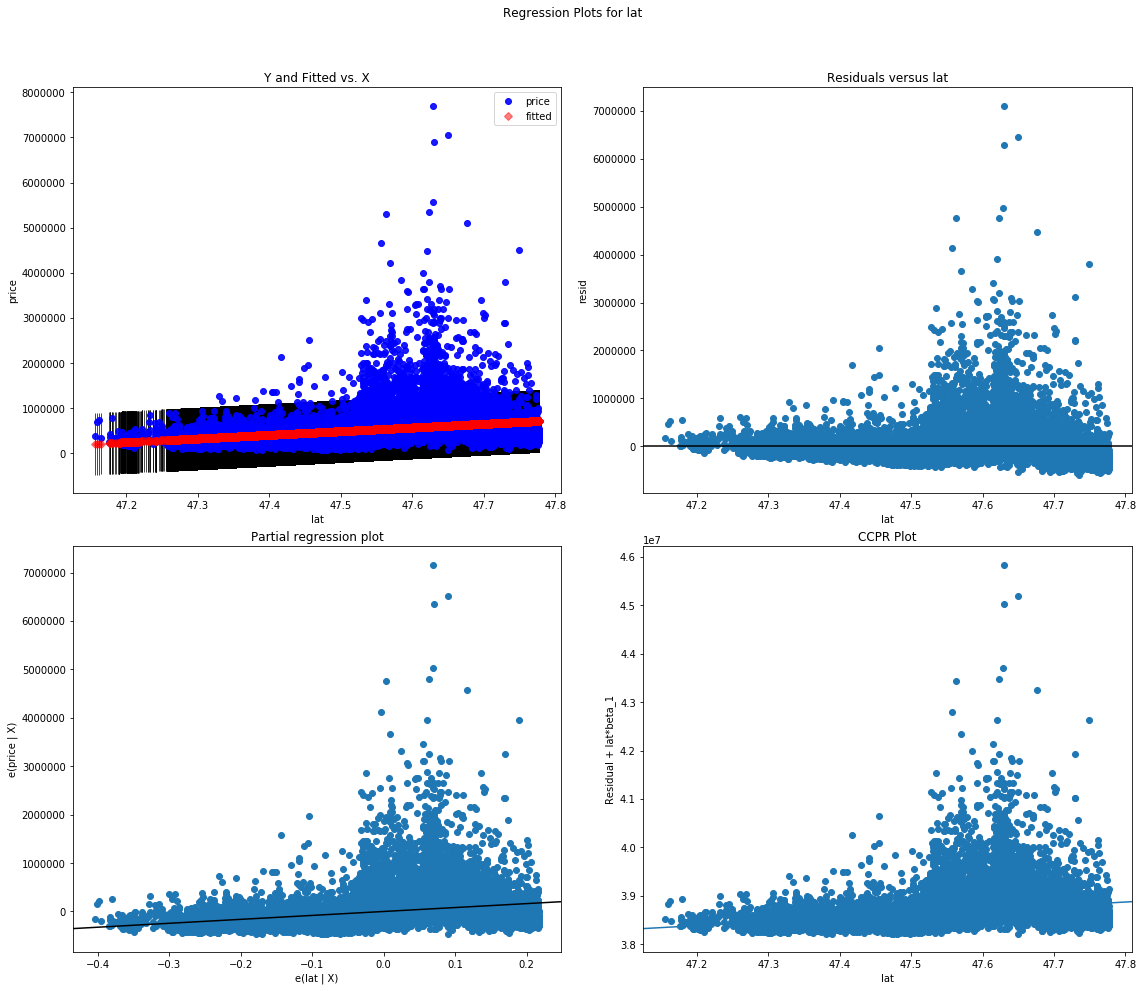

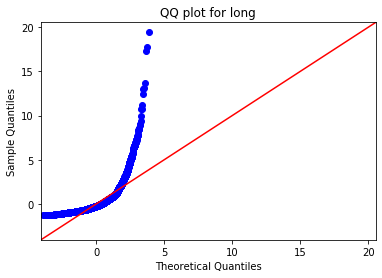

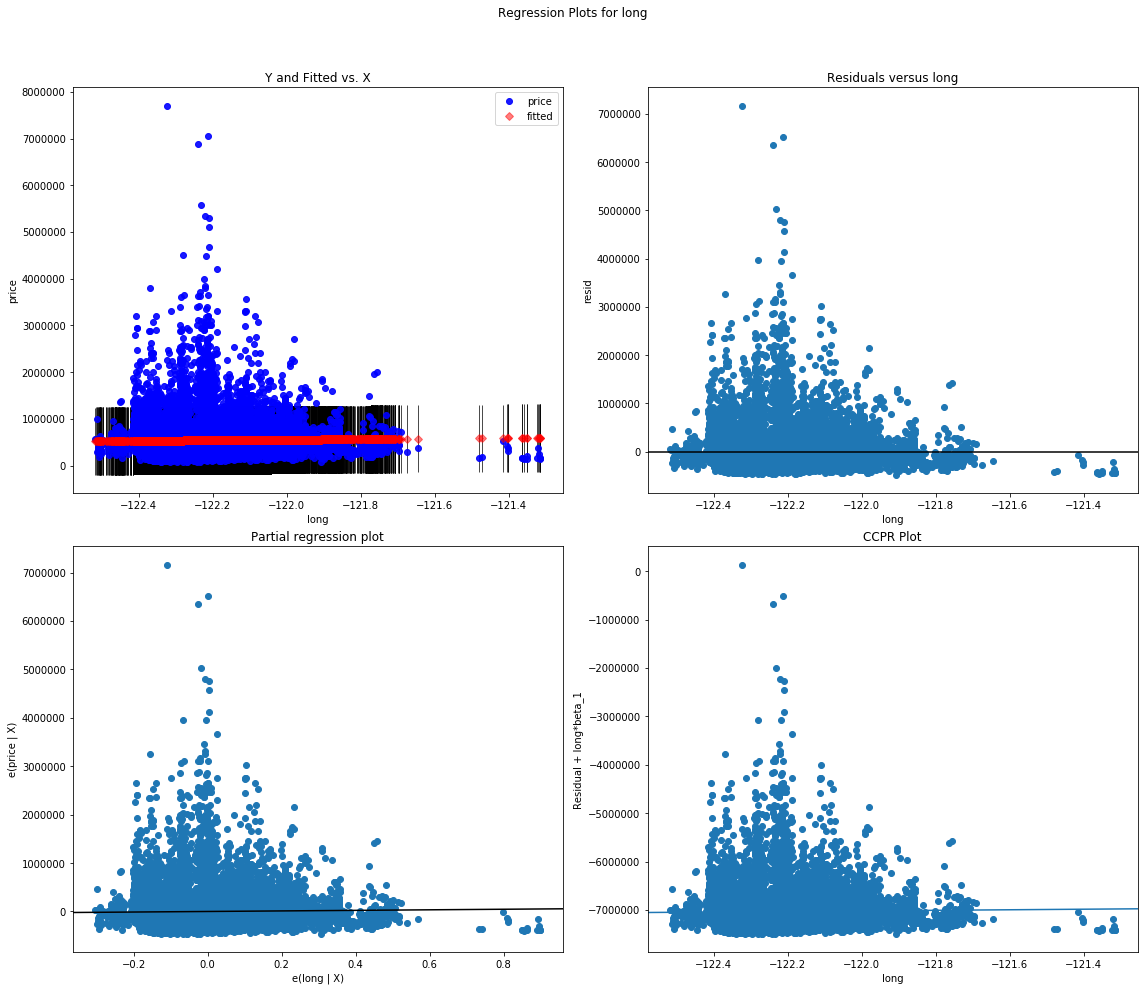

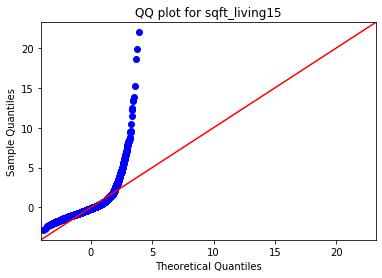

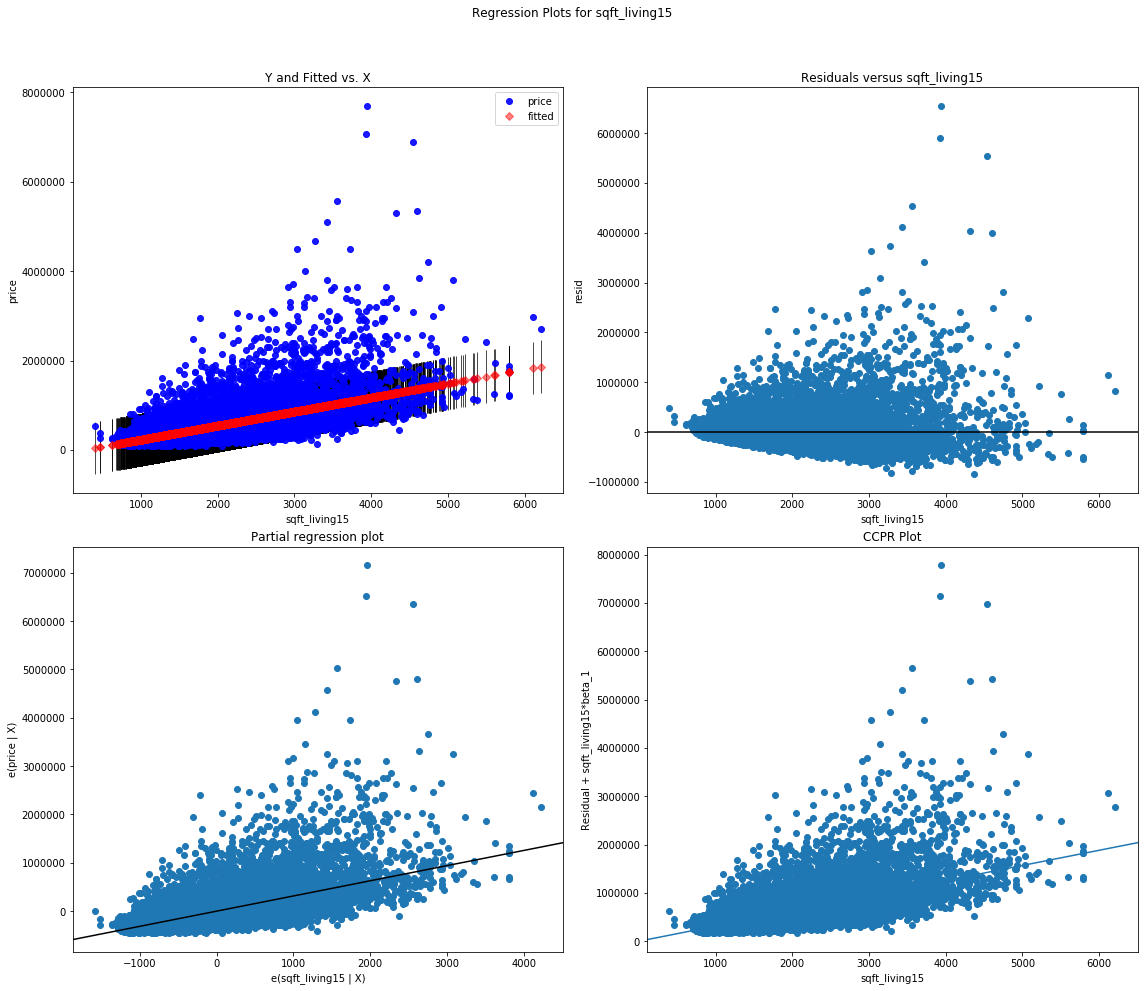

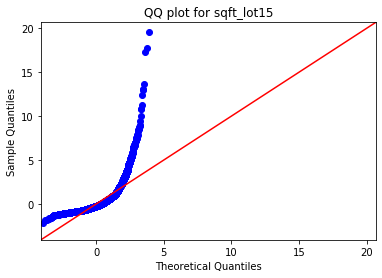

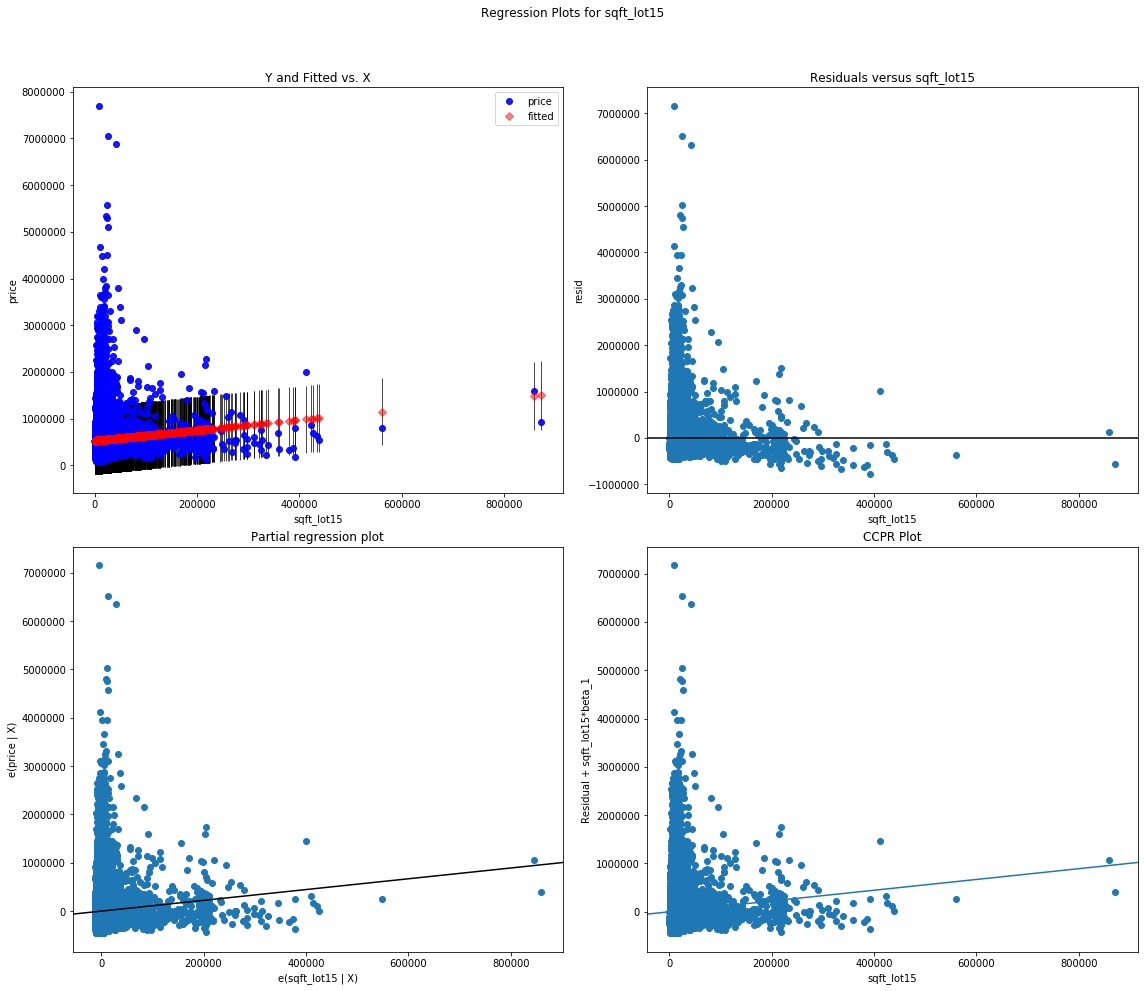

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

data2 = data.drop(['date', 'sqft_basement'], axis=1)

for column in data2.columns:
    formula = 'price' + '~' + column
    model = ols(formula=formula, data=data2).fit()
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.title('QQ plot for ' + str(column))
    plt.show();
    fig = plt.figure(figsize=(16,14))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    

### Explore the distribution of prices looking for a place to cut

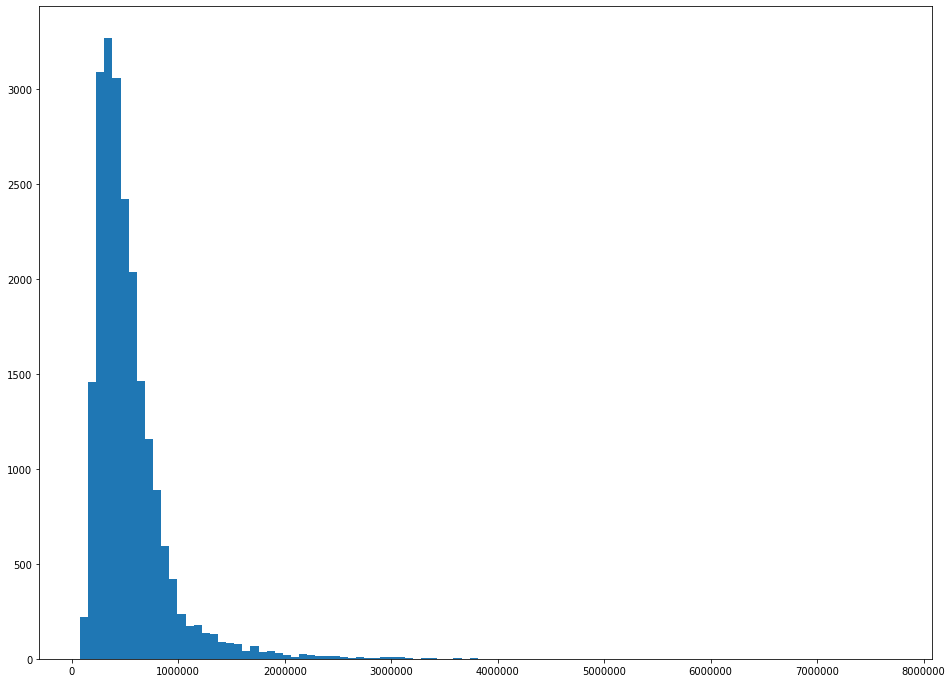

In [35]:
plt.figure(figsize=(16,12))
plt.hist(data['price'], bins=100)
plt.show();

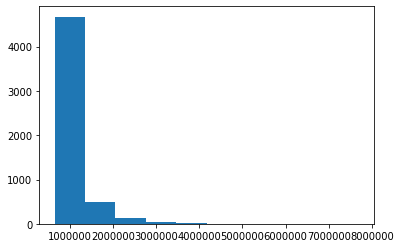

In [47]:
price_75th = data[data['price'] > np.quantile(data['price'], 0.75)]
plt.hist(price_75th['price']);

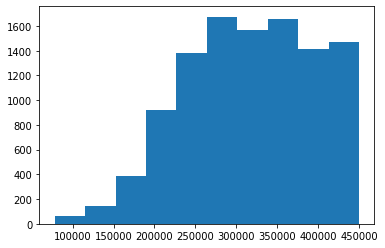

In [28]:
price_lower_half = data[data['price'] < np.median(data['price'])]
plt.hist(price_lower_half['price']);

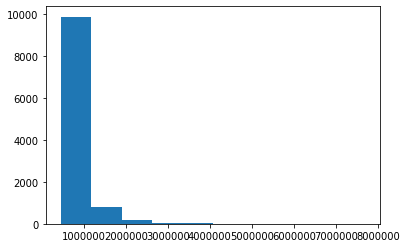

In [31]:
price_upper_half = data[data['price'] >= np.median(data['price'])]
plt.hist(price_upper_half['price']);

20107


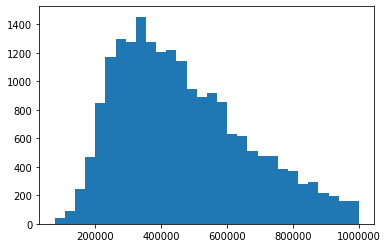

In [73]:
price_under_million = data[data['price'] < 1000000]
print(len(price_under_million))
plt.hist(price_under_million['price'], bins=30);

In [38]:
20107/21597

0.9310089364263555

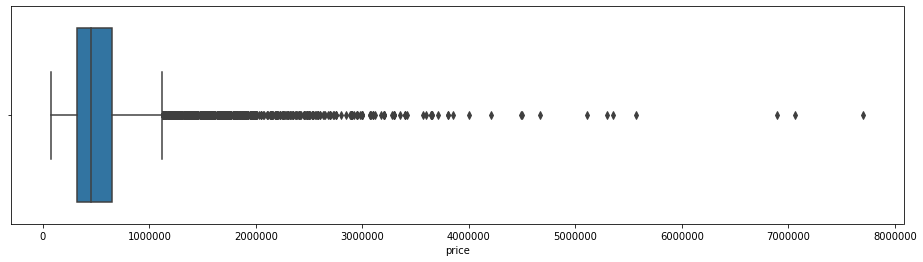

In [43]:
plt.figure(figsize=(16,4))
sns.boxplot(x='price', data=data)
plt.show();

In [48]:
np.mean(price_75th['price'])

987839.4369763545

In [45]:
np.median(data['price'])

450000.0

In [49]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [61]:
stdevs_2 = np.std(data['price']) * 2
hi = np.median(data['price']) + stdevs_2
lo = np.median(data['price']) - stdevs_2

In [62]:
price_2stdevs = data[(data['price'] < hi) & (data['price'] > lo)]
price_2stdevs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


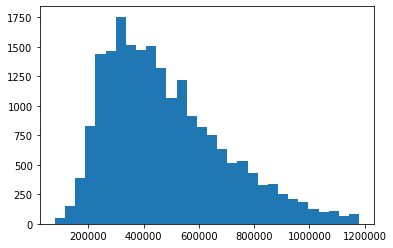

In [72]:
plt.hist(price_2stdevs['price'], bins=30);

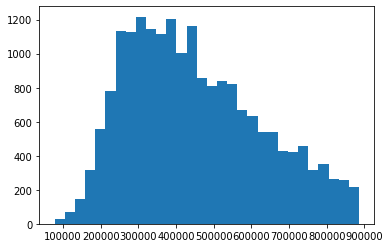

In [71]:
price_lower_90_percent = data[data['price'] < np.quantile(data['price'], 0.9)]
plt.hist(price_lower_90_percent['price'], bins=30);

450000.0
540296.5735055795
425000.0
450842.13562461414


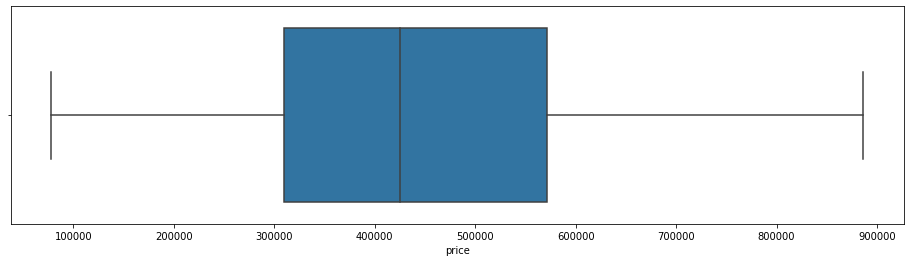

In [78]:
print(np.median(data['price']))
print(np.mean(data['price']))

print(np.median(price_lower_90_percent['price']))
print(np.mean(price_lower_90_percent['price']))

plt.figure(figsize=(16,4))
sns.boxplot(price_lower_90_percent.price);

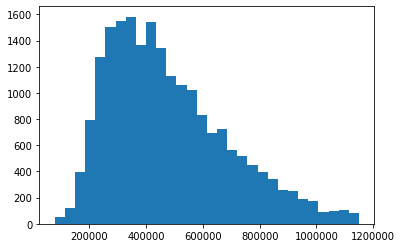

In [70]:
price_lower_95_percent = data[data['price'] < np.quantile(data['price'], 0.95)]
plt.hist(price_lower_95_percent['price'], bins=30);

450000.0
540296.5735055795
439000.0
479103.74386974116


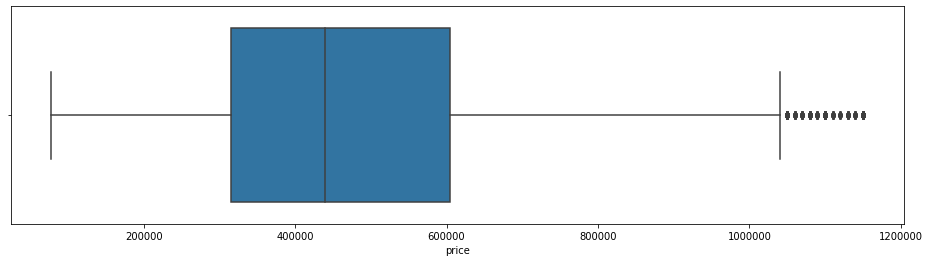

In [79]:
print(np.median(data['price']))
print(np.mean(data['price']))

print(np.median(price_lower_95_percent['price']))
print(np.mean(price_lower_95_percent['price']))

plt.figure(figsize=(16,4))
sns.boxplot(price_lower_95_percent.price);

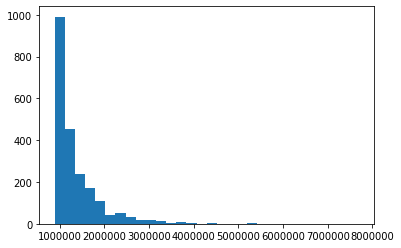

In [68]:
price_top_10_percent = data[data['price'] >= np.quantile(data['price'], 0.9)]
plt.hist(price_top_10_percent['price'], bins=30);

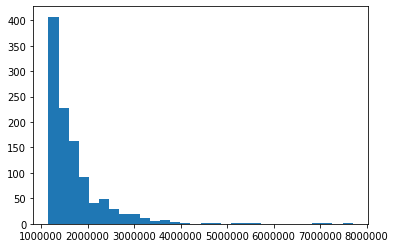

In [69]:
price_top_5_percent = data[data['price'] >= np.quantile(data['price'], 0.95)]
plt.hist(price_top_5_percent['price'], bins=30);

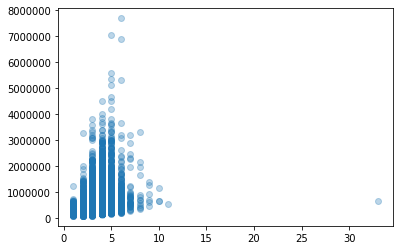

In [3]:
plt.scatter(data['bedrooms'], data['price'], alpha=0.3);

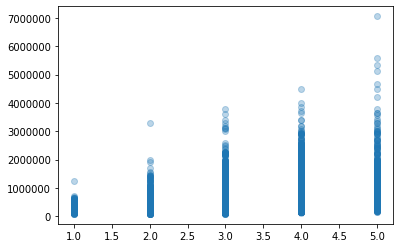

In [4]:
few_bedrooms = data[data['bedrooms'] <= 5]
plt.scatter(few_bedrooms['bedrooms'], few_bedrooms['price'], alpha=0.3)

### Define 'middle_class_homes'

In [124]:
middle_class_homes = data[(data['bedrooms'] <= 5) & (data['price'] < np.quantile(data['price'], 0.9))]
middle_class_homes.describe()
middle_class_homes.drop(['date', 'sqft_basement'], axis=1, inplace=True)

In [60]:
data_lower_90 = data[(data['price'] < np.quantile(data['price'], 0.9)) & (data['bedrooms'].isin(range(2, 6)))]
data_lower_90.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,1.899900e+04,18999.000000,18999.000000,18999.000000,18999.000000,1.899900e+04,18999.000000,16906.000000,18943.000000,18999.000000,18999.000000,18999.000000,18999.000000,15614.000000,18999.000000,18999.000000,18999.000000,18999.000000,18999.000000,18999.000000
mean,4.623793e+09,451033.600453,3.285910,2.012816,1912.888047,1.413348e+04,1.463682,0.002189,0.145331,3.405127,7.464498,1659.656298,1971.048424,66.947931,98078.543344,47.553219,-122.212729,1882.645929,12188.540871,6.580294
std,2.878978e+09,177148.927445,0.782848,0.672443,706.241075,3.852339e+04,0.536461,0.046732,0.582127,0.643411,0.959870,671.456125,28.847826,359.290326,53.294178,0.143337,0.142935,574.261538,25473.821194,3.120043
min,1.200019e+06,78000.000000,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,440.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.154950e+09,310000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1952.000000,0.000000,98033.000000,47.451150,-122.330000,1460.000000,5040.000000,4.000000
50%,3.943600e+09,425000.000000,3.000000,2.000000,1810.000000,7.486000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1480.000000,1975.000000,0.000000,98065.000000,47.562200,-122.233000,1780.000000,7515.000000,6.000000
75%,7.350400e+09,570000.000000,4.000000,2.500000,2340.000000,1.015000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2030.000000,1996.000000,0.000000,98118.000000,47.680700,-122.122000,2230.000000,9750.000000,9.000000
max,9.900000e+09,886000.000000,5.000000,5.000000,5820.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4670.000000,560617.000000,12.000000


In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### EDA on a bunch of featuers individually

In [ ]:
mch_features = middle_class_homes

In [13]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [27]:
data.waterfront.isna().sum()

2376

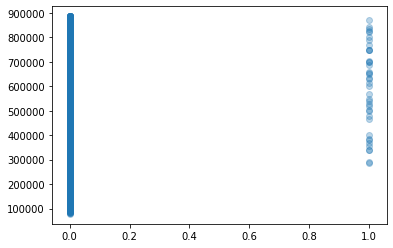

In [30]:
plt.scatter(x='waterfront', y='price', data=middle_class_homes, alpha=0.3)

In [32]:
middle_class_homes.waterfront.isna().sum()

2114

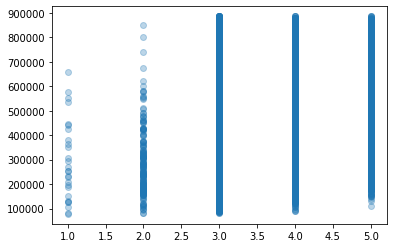

In [33]:
plt.scatter(x='condition', y='price', data=middle_class_homes, alpha=0.3);

In [35]:
middle_class_homes.condition.value_counts()

3    12471
4     5100
5     1433
2      163
1       27
Name: condition, dtype: int64

In [36]:
middle_class_homes.condition.isna().sum()

0

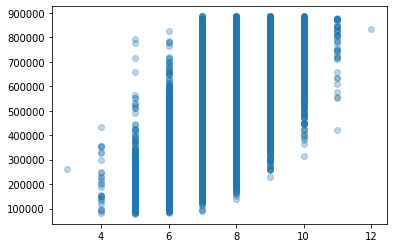

In [37]:
plt.scatter(x='grade', y='price', data=middle_class_homes, alpha=0.3);

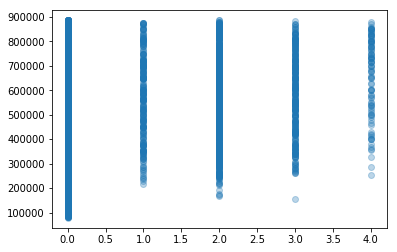

In [23]:
plt.scatter(x='view', y='price', data=middle_class_homes, alpha=0.3)

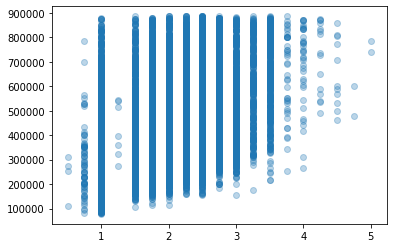

In [38]:
plt.scatter(x='bathrooms', y='price', data=middle_class_homes, alpha=0.3);

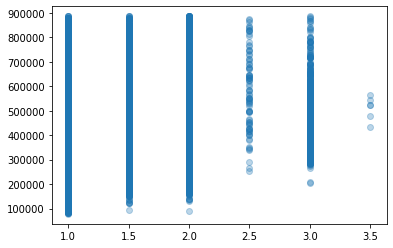

In [39]:
plt.scatter(x='floors', y='price', data=middle_class_homes, alpha=0.3);

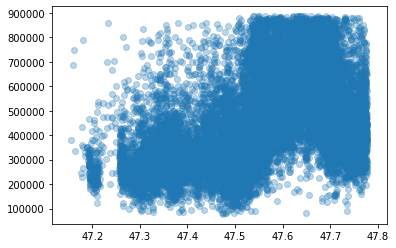

In [40]:
plt.scatter(x='lat', y='price', data=middle_class_homes, alpha=0.3);

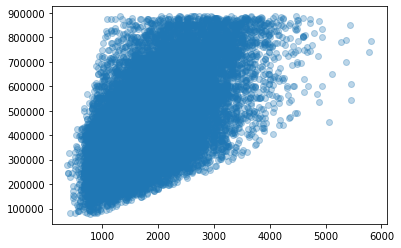

In [41]:
plt.scatter(x='sqft_living', y='price', data=middle_class_homes, alpha=0.3);

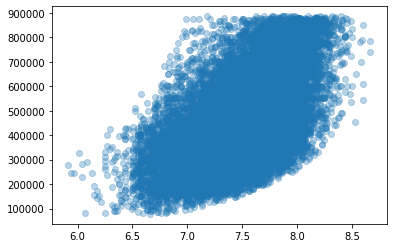

In [42]:
log_sqft_living = np.log(middle_class_homes['sqft_living'])

plt.scatter(x=log_sqft_living, y=middle_class_homes['price'], alpha=0.3)

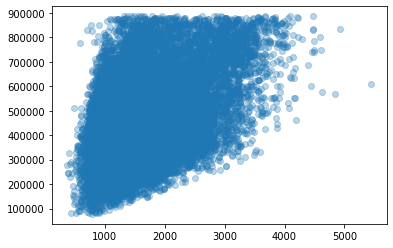

In [43]:
plt.scatter(x='sqft_above', y='price', data=middle_class_homes, alpha=0.3);

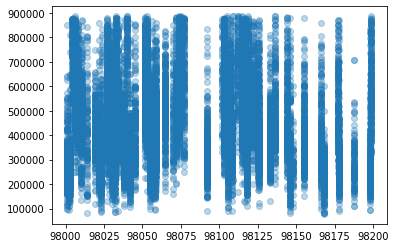

In [49]:
plt.scatter(x='zipcode', y='price', data=middle_class_homes, alpha=0.3);

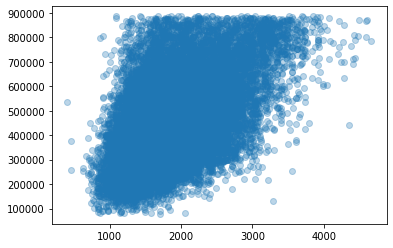

In [50]:
plt.scatter(x='sqft_living15', y='price', data=middle_class_homes, alpha=0.3);

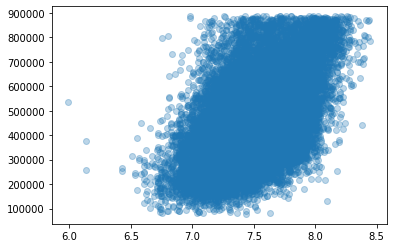

In [51]:
log_sqft_living15 = np.log(middle_class_homes['sqft_living15'])

plt.scatter(x=log_sqft_living15, y=middle_class_homes['price'], alpha=0.3)

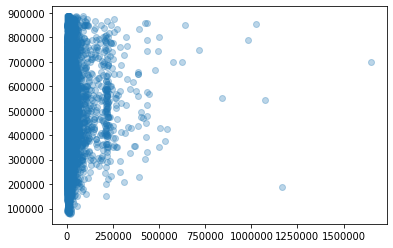

In [54]:
plt.scatter(x='sqft_lot', y='price', data=middle_class_homes, alpha=0.3);

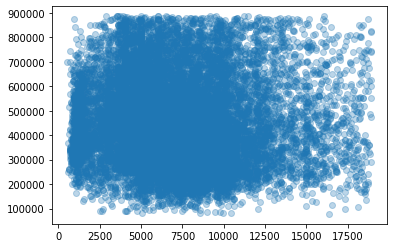

In [55]:
mc_lot_90 = middle_class_homes[middle_class_homes['sqft_lot'] < np.quantile(middle_class_homes['sqft_lot'], 0.9)]

plt.scatter(x='sqft_lot', y='price', data=mc_lot_90, alpha=0.3);

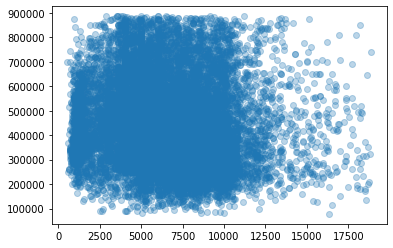

In [57]:
mc_lot15_90 = mc_lot_90[mc_lot_90['sqft_lot15'] < np.quantile(mc_lot_90['sqft_lot15'], 0.9)]

plt.scatter(x='sqft_lot', y='price', data=mc_lot15_90, alpha=0.3);

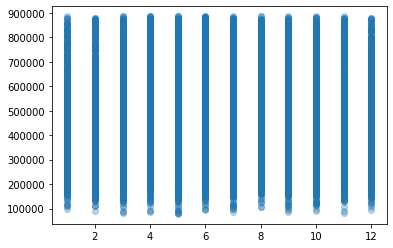

In [61]:
plt.scatter(x='month', y='price', data=middle_class_homes, alpha=0.3);

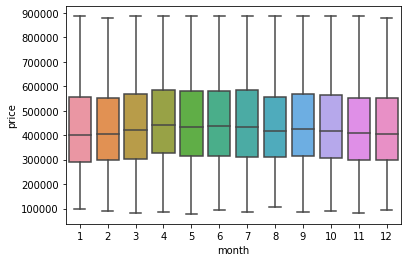

In [70]:
# groupby_month = middle_class_homes.groupby('month').mean()
# groupby_month
sns.boxplot(x='month', y='price', data=middle_class_homes);

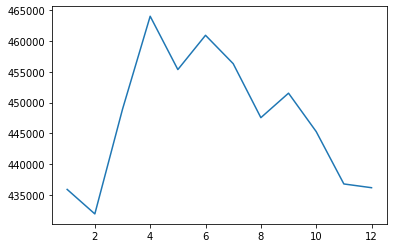

In [78]:
month_price = middle_class_homes.groupby('month')['price'].mean()
plt.plot(month_price)

In [81]:
month_price

month
1     435852.261768
2     431864.791667
3     448901.621148
4     464041.089277
5     455362.294722
6     460941.006796
7     456323.992370
8     447532.702029
9     451518.578816
10    445267.195093
11    436741.298732
12    436130.900612
Name: price, dtype: float64

In [93]:
april = month_price[4]
feb  = month_price[2]

(april-feb)/feb

0.07450548928915826

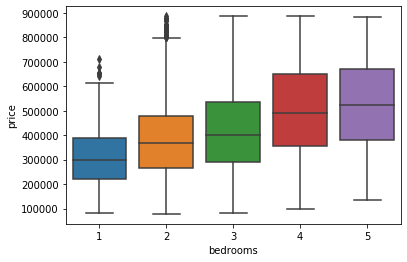

In [88]:
bed_price = middle_class_homes.groupby('bedrooms')['price'].mean()

sns.boxplot(x='bedrooms', y='price', data=middle_class_homes);

In [87]:
bed_price

bedrooms
1    313461.200000
2    385638.168452
3    424563.386685
4    507984.325963
5    531247.931064
Name: price, dtype: float64

In [91]:
bed4 = bed_price[4]
bed3 = bed_price[3]

(bed4-bed3) / bed3

0.19648641850416795

In [94]:
bed2 = bed_price[2]
bed1 = bed_price[1]

(bed2-bed1) / bed1

0.2302580620892189

In [95]:
(bed3-bed2) / bed2

0.10093715149960927

In [96]:
grade_price = middle_class_homes.groupby('grade')['price'].mean()
grade_price

grade
3     262000.000000
4     212001.851852
5     248107.953975
6     298196.675408
7     395985.819248
8     505453.622551
9     635010.447624
10    727187.296875
11    765012.023810
12    835000.000000
Name: price, dtype: float64

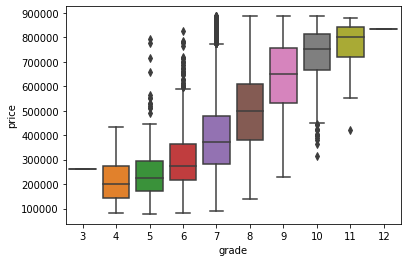

In [98]:
sns.boxplot(x='grade', y='price', data=middle_class_homes);

In [99]:
(grade_price[7]- grade_price[6]) / grade_price[6]

0.3279350573114546

In [100]:
(grade_price[8] - grade_price[7]) / grade_price[7]

0.2764437461681822

In [102]:
(grade_price[9] - grade_price[8]) / grade_price[8]

0.2563179276851181

In [104]:
cond_price = middle_class_homes.groupby('condition')['price'].mean()
cond_price

condition
1    294757.407407
2    297735.822086
3    452363.444391
4    440257.312745
5    479473.907886
Name: price, dtype: float64

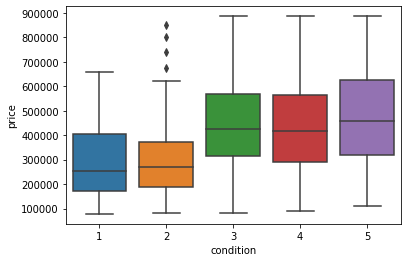

In [105]:
sns.boxplot(x='condition', y='price', data=middle_class_homes);

In [106]:
(cond_price[3] - cond_price[2]) / cond_price[2]

0.519345039578379

In [107]:
(cond_price[5] - cond_price[3]) / cond_price[3]

0.059930712418785836

In [108]:
bath_price = middle_class_homes.groupby('bathrooms')['price'].mean()
bath_price

bathrooms
0.50    237375.000000
0.75    294936.647887
1.00    342358.928235
1.25    422278.571429
1.50    391053.837509
1.75    434803.664291
2.00    437620.355135
2.25    466185.107027
2.50    497138.049990
2.75    557050.406412
3.00    540215.386029
3.25    601893.388013
3.50    644201.245192
3.75    646403.974359
4.00    688052.162162
4.25    719106.666667
4.50    654714.090909
4.75    539500.000000
5.00    762250.000000
Name: price, dtype: float64

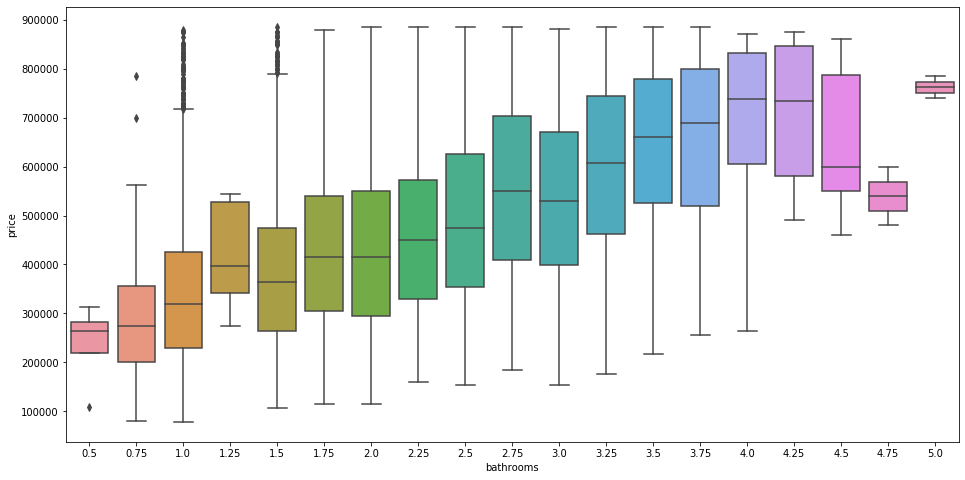

In [110]:
plt.figure(figsize=(16,8))
sns.boxplot(x='bathrooms', y='price', data=middle_class_homes);

### Make a df with my arbitrary features/dummies

In [120]:
condition_dummies = pd.get_dummies(middle_class_homes['condition'], prefix='condition')
grade_dummies = pd.get_dummies(middle_class_homes['grade'], prefix='grade')
bathrooms_dummies = pd.get_dummies(middle_class_homes['bathrooms'], prefix='bathrooms')
bathrooms_dummies.head()

,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
bath_cols_dict = {'bathrooms_0.5': 'bathrooms_0_5','bathrooms_0.75': 'bathrooms_0_75',
                 'bathrooms_1.0': 'bathrooms_1_0','bathrooms_1.25': 'bathrooms_1_25',
                 'bathrooms_1.5': 'bathrooms_1_5','bathrooms_1.75': 'bathrooms_1_75',
                 'bathrooms_2.0': 'bathrooms_2_0','bathrooms_2.25': 'bathrooms_2_25',
                 'bathrooms_2.5': 'bathrooms_2_5','bathrooms_2.75': 'bathrooms_2_75',
                 'bathrooms_3.0': 'bathrooms_3_0','bathrooms_3.25': 'bathrooms_3_25',
                 'bathrooms_3.5': 'bathrooms_3_5','bathrooms_3.75': 'bathrooms_3_75', 
                 'bathrooms_4.0': 'bathrooms_4_0','bathrooms_4.25': 'bathrooms_4_25',
                 'bathrooms_4.5': 'bathrooms_4_5','bathrooms_4.75': 'bathrooms_4_75',
                 'bathrooms_5.0': 'bathrooms_5_0',}

bathrooms_dummies.rename(columns=bath_cols_dict, inplace=True)
bathrooms_dummies.head()

,bathrooms_0_5,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
middle_class_homes.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,2


In [134]:
# middle_class_homes.head()
mc_select = middle_class_homes[['price', 'bedrooms']]
mc_select.head()
mc_data = pd.concat([mc_select, condition_dummies, 
                     grade_dummies, bathrooms_dummies], axis=1)
mc_data.head()

,price,bedrooms,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,...,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0
0,221900.0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Try out the model on my arbitrary features

In [139]:
mc_features = mc_data.drop('price', axis=1)
mc_target = mc_data['price']
cols = mc_features.columns
cols_joined = '+'.join(cols)

formula = 'price' + '~' + cols_joined
formula
model = ols(formula=formula, data= mc_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     381.2
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:55:28   Log-Likelihood:            -2.5448e+05
No. Observations:               19194   AIC:                         5.090e+05
Df Residuals:                   19161   BIC:                         5.093e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.457e+05   1.71e+04     20.188      0.000    3.12e+05    3.79e+05
bedrooms        1.147e+04   1440.620      7.961      0.000    8645.347    1.43e+04
condition_1     6.636e+04   2.26e+04      2.937      0.003    2.21e+04    1.11e+05
condition_2     1.371e+04   1.07e+04      1.285      0.199   -7201.802    3.46e+04
condition_3     4.926e+04   6154.745      8.004      0.000    3.72e+04    6.13e+04
condition_4     8.266e+04   6275.934     13.170      0.000    7.04e+04     9.5e+04
condition_5     1.337e+05   6743.688     19.832      0.000    1.21e+05    1.47e+05
grade_3        -2.229e+05   1.28e+05     -1.747      0.081   -4.73e+05    2.71e+04
grade_4        -1.975e+05   3.12e+04     -6.323      0.000   -2.59e+05   -1.36e+05
grade_5        -1.801e+05   2.07e+04     -8.708      0.000   -2.21e+05    -1.4e+05
grade_6        -1.343e+05   1.93e+04     -6.959      0.000   -1.72e+05   -9.64e+04
grade_7        -4.634e+04   1.91e+04     -2.422      0.015   -8.38e+04   -8838.714
grade_8          6.21e+04   1.92e+04      3.239      0.001    2.45e+04    9.97e+04
grade_9         1.891e+05   1.93e+04      9.784      0.000    1.51e+05    2.27e+05
grade_10        2.722e+05   1.99e+04     13.697      0.000    2.33e+05    3.11e+05
grade_11        3.107e+05   2.74e+04     11.350      0.000    2.57e+05    3.64e+05
grade_12        2.926e+05   1.31e+05      2.235      0.025     3.6e+04    5.49e+05
bathrooms_0_5  -9.516e+04   6.65e+04     -1.432      0.152   -2.25e+05    3.51e+04
bathrooms_0_75 -6071.9211    1.9e+04     -0.319      0.750   -4.33e+04    3.12e+04
bathrooms_1_0  -1.786e+04   9587.482     -1.863      0.063   -3.67e+04     932.412
bathrooms_1_25 -3.711e+04   5.06e+04     -0.734      0.463   -1.36e+05     6.2e+04
bathrooms_1_5  -2.357e+04   9879.092     -2.386      0.017   -4.29e+04   -4209.224
bathrooms_1_75   317.9056   9523.645      0.033      0.973   -1.83e+04     1.9e+04
bathrooms_2_0   3189.0319   9695.341      0.329      0.742   -1.58e+04    2.22e+04
bathrooms_2_25 -1.315e+04   9679.133     -1.359      0.174   -3.21e+04    5818.401
bathrooms_2_5  -1.567e+04   9357.602     -1.675      0.094    -3.4e+04    2668.586
bathrooms_2_75  3.299e+04   1.01e+04      3.266      0.001    1.32e+04    5.28e+04
bathrooms_3_0   2.872e+04   1.08e+04      2.664      0.008    7589.101    4.98e+04
bathrooms_3_25  4.119e+04   1.18e+04      3.494      0.000    1.81e+04    6.43e+04
bathrooms_3_5   6.426e+04   1.13e+04      5.703      0.000    4.22e+04    8.63e+04
bathrooms_3_75  9.299e+04    2.3e+04      4.048      0.000     4.8e+04    1.38e+05
bathrooms_4_0   9.494e+04   2.36e+04      4.031      0.000    4.88e+04    1.41e+05
bathrooms_4_25  1.015e+05   3.62e+04      2.803      0.005    3.05e+04    1.72e+05
bathrooms_4_5   2.102e+04   4.08e+04      0.515      0.606   -5.89e+04    1.01e+05
bathrooms_4_

In [140]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [141]:
result = stepwise_selection(mc_features, mc_target, verbose = True)
print('resulting features:')
print(result)

/Users/jennykreiger/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade_6                        with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  grade_7                        with p-value 0.0
Add  grade_10                       with p-value 3.36787e-250
Add  grade_5                        with p-value 2.91704e-159
Add  condition_5                    with p-value 8.54956e-94
Add  bedrooms                       with p-value 3.8167e-51
Add  condition_4                    with p-value 3.74706e-42
Add  grade_11                       with p-value 2.9892e-33
Add  grade_4                        with p-value 5.3664e-22
Add  bathrooms_3_5                  with p-value 1.15773e-19
Add  bathrooms_2_75                 with p-value 3.74291e-16
Add  bathrooms_3_25                 with p-value 8.37826e-10
Add  bathrooms_3_0                  with p-value 3.7287e-10
Add  bathrooms_1_75                 with p-value 2.57622e-06
Add  bathrooms_2_0                  with p-value 4.05452e-08
Add  bathrooms_3_75                 with p-value 1

In [142]:
stepwise_selections = ['grade_6', 'grade_9', 'grade_7', 'grade_10', 
                       'grade_5', 'condition_5', 'bedrooms', 'condition_4', 
                       'grade_11', 'grade_4', 'bathrooms_3_5', 
                       'bathrooms_2_75', 'bathrooms_3_25', 'bathrooms_3_0', 
                       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_3_75', 
                       'bathrooms_4_0', 'bathrooms_4_25', 'condition_2']

cols_to_drop = [col for col in mc_data.columns if not col in stepwise_selections]

stepwise_selections = mc_data.drop(cols_to_drop, axis=1)
stepwise_selections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 0 to 21596
Data columns (total 20 columns):
bedrooms          19194 non-null int64
condition_2       19194 non-null uint8
condition_4       19194 non-null uint8
condition_5       19194 non-null uint8
grade_4           19194 non-null uint8
grade_5           19194 non-null uint8
grade_6           19194 non-null uint8
grade_7           19194 non-null uint8
grade_9           19194 non-null uint8
grade_10          19194 non-null uint8
grade_11          19194 non-null uint8
bathrooms_1_75    19194 non-null uint8
bathrooms_2_0     19194 non-null uint8
bathrooms_2_75    19194 non-null uint8
bathrooms_3_0     19194 non-null uint8
bathrooms_3_25    19194 non-null uint8
bathrooms_3_5     19194 non-null uint8
bathrooms_3_75    19194 non-null uint8
bathrooms_4_0     19194 non-null uint8
bathrooms_4_25    19194 non-null uint8
dtypes: int64(1), uint8(19)
memory usage: 1.3 MB


In [144]:
# Initialize and run the model using statsmodels
features_sum = '+'.join(stepwise_selections.columns)
formula = 'price' + '~' + features_sum

model = ols(formula=formula, data=mc_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     609.1
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:58:30   Log-Likelihood:            -2.5448e+05
No. Observations:               19194   AIC:                         5.090e+05
Df Residuals:                   19173   BIC:                         5.092e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.394e+05   4929.223     89.132      0.000     4.3e+05    4.49e+05
bedrooms          1.2e+04   1363.739      8.797      0.000    9323.700    1.47e+04
condition_2    -3.577e+04    1.1e+04     -3.241      0.001   -5.74e+04   -1.41e+04
condition_4     3.308e+04   2371.623     13.947      0.000    2.84e+04    3.77e+04
condition_5     8.409e+04   3959.804     21.235      0.000    7.63e+04    9.18e+04
grade_4         -2.54e+05   2.69e+04     -9.436      0.000   -3.07e+05   -2.01e+05
grade_5        -2.424e+05   9327.153    -25.989      0.000   -2.61e+05   -2.24e+05
grade_6        -1.977e+05   3791.659    -52.147      0.000   -2.05e+05    -1.9e+05
grade_7        -1.095e+05   2435.938    -44.972      0.000   -1.14e+05   -1.05e+05
grade_9         1.272e+05   3695.780     34.409      0.000     1.2e+05    1.34e+05
grade_10        2.104e+05   6531.963     32.204      0.000    1.98e+05    2.23e+05
grade_11        2.492e+05   2.15e+04     11.572      0.000    2.07e+05    2.91e+05
bathrooms_1_75  1.735e+04   2920.832      5.939      0.000    1.16e+04    2.31e+04
bathrooms_2_0   2.019e+04   3510.384      5.750      0.000    1.33e+04    2.71e+04
bathrooms_2_75   4.91e+04   4765.154     10.304      0.000    3.98e+04    5.84e+04
bathrooms_3_0   4.483e+04   6171.443      7.263      0.000    3.27e+04    5.69e+04
bathrooms_3_25  5.704e+04   8000.297      7.130      0.000    4.14e+04    7.27e+04
bathrooms_3_5   7.992e+04   7128.686     11.212      0.000     6.6e+04    9.39e+04
bathrooms_3_75  1.088e+05   2.23e+04      4.877      0.000    6.51e+04    1.53e+05
bathrooms_4_0   1.106e+05    2.3e+04      4.820      0.000    6.56e+04    1.56e+05
bathrooms_4_25  1.325e+05   3.59e+04      3.686      0.000     6.2e+04    2.03e+05
==============================================================================
Omnibus:                      529.695   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.204
Skew:                           0.423   Prob(JB):                    2.06e-125
Kurtosis:                       2.955   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Try modeling 'middle_class_homes

## Replicating process from draft, but starting the cleaning with creating middle_class_homes

In [9]:
middle_class_homes = data[(data['bedrooms'] <= 5) & (data['price'] < np.quantile(data['price'], 0.9))]
middle_class_homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
middle_class_homes['bedrooms'].describe()

count    19194.000000
mean         3.262686
std          0.811896
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64

In [11]:
# THIS IS NO LONGER NEEDED
# # Drop the row with 33 bedrooms from the dataset
# bedroom_to_drop = data[data['bedrooms'] == 33].index
# data.drop(bedroom_to_drop, inplace=True)

# # Check that it is gone
# plt.scatter(data['bedrooms'], data['price'])
# plt.show();

In [12]:
# Create the month column
# middle_class_homes['month'] = [x.split('/')[0] for x in middle_class_homes['date']]

# middle_class_homes.info()

In [13]:
middle_class_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 0 to 21596
Data columns (total 21 columns):
id               19194 non-null int64
date             19194 non-null object
price            19194 non-null float64
bedrooms         19194 non-null int64
bathrooms        19194 non-null float64
sqft_living      19194 non-null int64
sqft_lot         19194 non-null int64
floors           19194 non-null float64
waterfront       17080 non-null float64
view             19138 non-null float64
condition        19194 non-null int64
grade            19194 non-null int64
sqft_above       19194 non-null int64
sqft_basement    19194 non-null object
yr_built         19194 non-null int64
yr_renovated     15773 non-null float64
zipcode          19194 non-null int64
lat              19194 non-null float64
long             19194 non-null float64
sqft_living15    19194 non-null int64
sqft_lot15       19194 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


In [15]:
# Inspect values in 'sqft_basement'
# middle_class_homes['sqft_basement'].unique()




# # Replace '?' with '0.0'
# middle_class_homes['sqft_basement'] = middle_class_homes['sqft_basement'].replace('?', '0.0')

# # Cast 'sqft_basement_clean' to float
# middle_class_homes['sqft_basement'] = middle_class_homes['sqft_basement'].astype('float64')
# middle_class_homes.info()


str

In [21]:
basement_clean = middle_class_homes['sqft_basement'].replace('?', '0.0')
middle_class_homes['sqft_basement'] = basement_clean.astype('float64')

/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
middle_class_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 0 to 21596
Data columns (total 21 columns):
id               19194 non-null int64
date             19194 non-null object
price            19194 non-null float64
bedrooms         19194 non-null int64
bathrooms        19194 non-null float64
sqft_living      19194 non-null int64
sqft_lot         19194 non-null int64
floors           19194 non-null float64
waterfront       17080 non-null float64
view             19138 non-null float64
condition        19194 non-null int64
grade            19194 non-null int64
sqft_above       19194 non-null int64
sqft_basement    19194 non-null float64
yr_built         19194 non-null int64
yr_renovated     15773 non-null float64
zipcode          19194 non-null int64
lat              19194 non-null float64
long             19194 non-null float64
sqft_living15    19194 non-null int64
sqft_lot15       19194 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.8+ MB
